In [168]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", df.shape)
row_count = df.shape[0]
df.head()


Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


     bias        TV     Radio  Newspaper     Sales
0       1  0.969852  0.981522   1.778945  1.552053
1       1 -1.197376  1.082808   0.669579 -0.696046
2       1 -1.516155  1.528463   1.783549 -0.907406
3       1  0.052050  1.217855   1.286405  0.860330
4       1  0.394182 -0.841614   1.281802 -0.215683
..    ...       ...       ...        ...       ...
195     1 -1.270941 -1.321031  -0.771217 -1.234053
196     1 -0.617035 -1.240003  -1.033598 -0.830548
197     1  0.349810 -0.942899  -1.111852 -0.234898
198     1  1.594565  1.265121   1.640850  2.205347
199     1  0.993206 -0.990165  -1.005979 -0.119610

[200 rows x 5 columns]


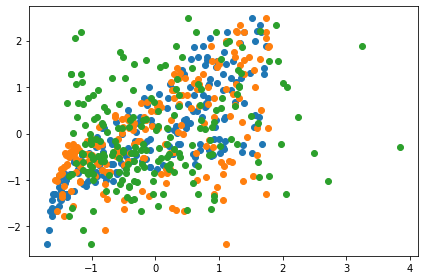

In [49]:
#to standardized the database

scaler = StandardScaler()
scaler.fit(df)

#to scale the dataframe
x_scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#to add extra column composed of 1s
x_scaled_data.insert(0,'bias',[1]*row_count)
print(x_scaled_data)

#sns.distplot(x_scaled_data)
plt.scatter(x=x_scaled_data['TV'],y=x_scaled_data['Sales'])
plt.scatter(x=x_scaled_data['Radio'],y=x_scaled_data['Sales'])
plt.scatter(x=x_scaled_data['Newspaper'],y=x_scaled_data['Sales'])
 
plt.tight_layout()
plt.show()


In [45]:
#separate predictor and target variable
x = x_scaled_data[['bias','TV','Radio','Newspaper']]
y = x_scaled_data['Sales']
print(x)

     bias        TV     Radio  Newspaper
0       1  0.969852  0.981522   1.778945
1       1 -1.197376  1.082808   0.669579
2       1 -1.516155  1.528463   1.783549
3       1  0.052050  1.217855   1.286405
4       1  0.394182 -0.841614   1.281802
..    ...       ...       ...        ...
195     1 -1.270941 -1.321031  -0.771217
196     1 -0.617035 -1.240003  -1.033598
197     1  0.349810 -0.942899  -1.111852
198     1  1.594565  1.265121   1.640850
199     1  0.993206 -0.990165  -1.005979

[200 rows x 4 columns]


In [6]:
#split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [16]:
#initialize weights and other variables
init_w = np.array([0.0, 0.0, 0.0, 0.0])
m = len(y_train)
n = len(x_train)
b = 1
iterations = 2000
learning_rate = 0.01


In [17]:
#returns a vector of the predicted values y
def predict_y(b,x_train,init_w):
    y_predict = np.dot(x_train,init_w) + b
    return y_predict

y_predict = predict_y(b,x_train,init_w)
#predict_y(b,x_train,init_w)

In [18]:
#compute cost; returns a scalar value that tells us how accurate the model is.
def compute_cost(y_train, y_predict):
    cost = np.sum((y_predict - y_train)**2) / (2*m)
    return cost

#compute_cost(y_train,y_predict)


In [19]:
#compute gradient;returns a matrix w that represents the partial derivative of the cost function with respect to each parameter

def compute_gradient(x_train, y_predict, y_train):
    
    for i in range(iterations):
        error = y_predict - y_train
        weight_gradient = np.dot(x_train.T, error) / m
        bias_gradient = np.sum(error) / m
        
        
    return weight_gradient, bias_gradient

weight_gradient, bias_gradient = compute_gradient(x_train, y_predict, y_train)

#compute_gradient(x_train, y_predict, y_train)


In [20]:
# update weights: returns a 4x1 matrix that contains the updated weights. 

def update_weights(learning_rate, init_w, weight_gradient, bias_gradient, b):
    #for i in range(iterations):
        #init_w = init_w - learning_rate * gradient
    #return init_w
    b = b - learning_rate * bias_gradient
    init_w = init_w - learning_rate * weight_gradient
    return b, init_w

b, init_w = update_weights(learning_rate, init_w, weight_gradient, bias_gradient, b)

#update_weights(learning_rate, init_w, weight_gradient, bias_gradient, b)

In [54]:
#grad_descent: returns 2 matrices: one matrix for the weights, and one matrix for the cost values per iteration. 
#grad_descent calls the functions 1-5 until the number of iterations is reached.

def grad_descent(x, y, init_w, b, learning_rate, iterations):
    iteration_list = []
    cost_list = [0] * iterations
        
    for i in range(iterations):
        y_predict = predict_y(b,x_train,init_w)
        
        cost = compute_cost(y_train, y_predict)
        prev_bias = b
        prev_w = init_w
        b,init_w = update_weights(learning_rate,init_w, prev_w, prev_bias, b)
        cost_list[i] = cost
        iteration_list.append(i)
        
        print("iteration: ",i,"cost: ",cost, " weights: ",init_w)
        #if (i%(iterations/10)==0):
            #print("iteration: ",i,"cost: ",cost, " weights: ",init_w)
        
    return iteration_list, cost_list

x, y = grad_descent(x_train, y_train, init_w, 1, 0.01, 2000)

iteration:  0 cost:  0.9242330054792715  weights:  [-0.00936325  0.00684619  0.00563712  0.00221422]
iteration:  1 cost:  0.9150862303868056  weights:  [-0.00926962  0.00677773  0.00558074  0.00219207]
iteration:  2 cost:  0.9061276919688347  weights:  [-0.00917692  0.00670995  0.00552494  0.00217015]
iteration:  3 cost:  0.8973535821570351  weights:  [-0.00908515  0.00664285  0.00546969  0.00214845]
iteration:  4 cost:  0.888760169285227  weights:  [-0.0089943   0.00657642  0.00541499  0.00212697]
iteration:  5 cost:  0.8803437965627573  weights:  [-0.00890436  0.00651066  0.00536084  0.0021057 ]
iteration:  6 cost:  0.8721008805783225  weights:  [-0.00881532  0.00644555  0.00530723  0.00208464]
iteration:  7 cost:  0.8640279098336272  weights:  [-0.00872716  0.0063811   0.00525416  0.00206379]
iteration:  8 cost:  0.8561214433062836  weights:  [-0.00863989  0.00631729  0.00520162  0.00204316]
iteration:  9 cost:  0.8483781090413718  weights:  [-0.00855349  0.00625411  0.0051496   0.0

iteration:  234 cost:  0.4943058779629128  weights:  [-0.00089138  0.00065176  0.00053665  0.00021079]
iteration:  235 cost:  0.494277063022515  weights:  [-0.00088246  0.00064524  0.00053129  0.00020868]
iteration:  236 cost:  0.4942494132464411  weights:  [-0.00087364  0.00063879  0.00052597  0.0002066 ]
iteration:  237 cost:  0.49422289953045107  weights:  [-0.0008649   0.0006324   0.00052071  0.00020453]
iteration:  238 cost:  0.49419749340865377  weights:  [-0.00085625  0.00062607  0.00051551  0.00020249]
iteration:  239 cost:  0.4941731670402124  weights:  [-0.00084769  0.00061981  0.00051035  0.00020046]
iteration:  240 cost:  0.49414989319631986  weights:  [-0.00083922  0.00061361  0.00050525  0.00019846]
iteration:  241 cost:  0.4941276452474394  weights:  [-0.00083082  0.00060748  0.00050019  0.00019647]
iteration:  242 cost:  0.4941063971508051  weights:  [-0.00082251  0.0006014   0.00049519  0.00019451]
iteration:  243 cost:  0.49408612343817654  weights:  [-0.00081429  0.0

iteration:  454 cost:  0.49522994744005916  weights:  [-9.76798658e-05  7.14212324e-05  5.88078495e-05  2.30992829e-05]
iteration:  455 cost:  0.49523543368240136  weights:  [-9.67030672e-05  7.07070201e-05  5.82197710e-05  2.28682900e-05]
iteration:  456 cost:  0.49524087559387764  weights:  [-9.57360365e-05  6.99999499e-05  5.76375733e-05  2.26396071e-05]
iteration:  457 cost:  0.49524627340821875  weights:  [-9.47786761e-05  6.92999504e-05  5.70611976e-05  2.24132111e-05]
iteration:  458 cost:  0.4952516273609886  weights:  [-9.38308894e-05  6.86069509e-05  5.64905856e-05  2.21890790e-05]
iteration:  459 cost:  0.49525693768948315  weights:  [-9.28925805e-05  6.79208814e-05  5.59256798e-05  2.19671882e-05]
iteration:  460 cost:  0.49526220463263154  weights:  [-9.19636547e-05  6.72416726e-05  5.53664230e-05  2.17475163e-05]
iteration:  461 cost:  0.49526742843090027  weights:  [-9.10440181e-05  6.65692559e-05  5.48127587e-05  2.15300411e-05]
iteration:  462 cost:  0.4952726093261996

iteration:  628 cost:  0.49571914838335734  weights:  [-1.69953031e-05  1.24265680e-05  1.02319677e-05  4.01904027e-06]
iteration:  629 cost:  0.49572025581935064  weights:  [-1.68253501e-05  1.23023023e-05  1.01296480e-05  3.97884986e-06]
iteration:  630 cost:  0.4957213524998004  weights:  [-1.66570966e-05  1.21792793e-05  1.00283515e-05  3.93906136e-06]
iteration:  631 cost:  0.49572243852591735  weights:  [-1.64905256e-05  1.20574865e-05  9.92806798e-06  3.89967075e-06]
iteration:  632 cost:  0.4957235139980266  weights:  [-1.63256203e-05  1.19369116e-05  9.82878730e-06  3.86067404e-06]
iteration:  633 cost:  0.49572457901557376  weights:  [-1.61623641e-05  1.18175425e-05  9.73049943e-06  3.82206730e-06]
iteration:  634 cost:  0.49572563367713146  weights:  [-1.60007405e-05  1.16993671e-05  9.63319443e-06  3.78384663e-06]
iteration:  635 cost:  0.49572667808040527  weights:  [-1.58407331e-05  1.15823734e-05  9.53686249e-06  3.74600816e-06]
iteration:  636 cost:  0.4957277123222401 

iteration:  800 cost:  0.49581131390168537  weights:  [-3.01704915e-06  2.20599575e-06  1.81640475e-06  7.13470183e-07]
iteration:  801 cost:  0.495811515198521  weights:  [-2.98687866e-06  2.18393579e-06  1.79824070e-06  7.06335481e-07]
iteration:  802 cost:  0.49581171449243566  weights:  [-2.95700987e-06  2.16209643e-06  1.78025830e-06  6.99272127e-07]
iteration:  803 cost:  0.49581191180325834  weights:  [-2.92743977e-06  2.14047547e-06  1.76245571e-06  6.92279405e-07]
iteration:  804 cost:  0.4958121071506241  weights:  [-2.89816538e-06  2.11907071e-06  1.74483116e-06  6.85356611e-07]
iteration:  805 cost:  0.4958123005539756  weights:  [-2.86918372e-06  2.09788001e-06  1.72738285e-06  6.78503045e-07]
iteration:  806 cost:  0.49581249203256467  weights:  [-2.84049188e-06  2.07690121e-06  1.71010902e-06  6.71718015e-07]
iteration:  807 cost:  0.4958126816054543  weights:  [-2.81208697e-06  2.05613219e-06  1.69300793e-06  6.65000834e-07]
iteration:  808 cost:  0.4958128692915208  we

iteration:  1030 cost:  0.49582948956838263  weights:  [-2.99004099e-07  2.18624802e-07  1.80014458e-07  7.07083309e-08]
iteration:  1031 cost:  0.4958295096084795  weights:  [-2.96014058e-07  2.16438554e-07  1.78214313e-07  7.00012476e-08]
iteration:  1032 cost:  0.4958295294482739  weights:  [-2.93053918e-07  2.14274168e-07  1.76432170e-07  6.93012351e-08]
iteration:  1033 cost:  0.4958295490897672  weights:  [-2.90123379e-07  2.12131426e-07  1.74667848e-07  6.86082227e-08]
iteration:  1034 cost:  0.4958295685349403  weights:  [-2.87222145e-07  2.10010112e-07  1.72921170e-07  6.79221405e-08]
iteration:  1035 cost:  0.4958295877857548  weights:  [-2.84349923e-07  2.07910011e-07  1.71191958e-07  6.72429191e-08]
iteration:  1036 cost:  0.49582960684415184  weights:  [-2.81506424e-07  2.05830911e-07  1.69480039e-07  6.65704899e-08]
iteration:  1037 cost:  0.49582962571205447  weights:  [-2.78691360e-07  2.03772602e-07  1.67785238e-07  6.59047850e-08]
iteration:  1038 cost:  0.49582964439

iteration:  1255 cost:  0.4958312851331497  weights:  [-3.11598908e-08  2.27833831e-08  1.87597122e-08  7.36867445e-09]
iteration:  1256 cost:  0.49583128722250386  weights:  [-3.08482919e-08  2.25555493e-08  1.85721151e-08  7.29498771e-09]
iteration:  1257 cost:  0.49583128929096554  weights:  [-3.05398090e-08  2.23299938e-08  1.83863939e-08  7.22203783e-09]
iteration:  1258 cost:  0.49583129133874365  weights:  [-3.02344109e-08  2.21066938e-08  1.82025300e-08  7.14981745e-09]
iteration:  1259 cost:  0.49583129336604503  weights:  [-2.99320668e-08  2.18856269e-08  1.80205047e-08  7.07831928e-09]
iteration:  1260 cost:  0.49583129537307435  weights:  [-2.96327461e-08  2.16667706e-08  1.78402996e-08  7.00753609e-09]
iteration:  1261 cost:  0.49583129736003445  weights:  [-2.93364187e-08  2.14501029e-08  1.76618966e-08  6.93746073e-09]
iteration:  1262 cost:  0.4958312993271259  weights:  [-2.90430545e-08  2.12356019e-08  1.74852777e-08  6.86808612e-09]
iteration:  1263 cost:  0.49583130

iteration:  1503 cost:  0.4958314767932283  weights:  [-2.57705797e-09  1.88428449e-09  1.55150947e-09  6.09421301e-10]
iteration:  1504 cost:  0.49583147696603525  weights:  [-2.55128739e-09  1.86544164e-09  1.53599438e-09  6.03327088e-10]
iteration:  1505 cost:  0.4958314771371141  weights:  [-2.52577451e-09  1.84678723e-09  1.52063443e-09  5.97293817e-10]
iteration:  1506 cost:  0.4958314773064819  weights:  [-2.50051677e-09  1.82831935e-09  1.50542809e-09  5.91320879e-10]
iteration:  1507 cost:  0.49583147747415635  weights:  [-2.47551160e-09  1.81003616e-09  1.49037381e-09  5.85407670e-10]
iteration:  1508 cost:  0.49583147764015395  weights:  [-2.45075648e-09  1.79193580e-09  1.47547007e-09  5.79553594e-10]
iteration:  1509 cost:  0.49583147780449155  weights:  [-2.42624892e-09  1.77401644e-09  1.46071537e-09  5.73758058e-10]
iteration:  1510 cost:  0.4958314779671858  weights:  [-2.40198643e-09  1.75627628e-09  1.44610822e-09  5.68020477e-10]
iteration:  1511 cost:  0.4958314781

iteration:  1757 cost:  0.4958314927283933  weights:  [-2.00661297e-10  1.46718845e-10  1.20807489e-10  4.74522771e-11]
iteration:  1758 cost:  0.49583149274184884  weights:  [-1.98654684e-10  1.45251657e-10  1.19599415e-10  4.69777543e-11]
iteration:  1759 cost:  0.4958314927551699  weights:  [-1.96668137e-10  1.43799140e-10  1.18403420e-10  4.65079768e-11]
iteration:  1760 cost:  0.4958314927683576  weights:  [-1.94701456e-10  1.42361149e-10  1.17219386e-10  4.60428970e-11]
iteration:  1761 cost:  0.4958314927814136  weights:  [-1.92754441e-10  1.40937537e-10  1.16047192e-10  4.55824681e-11]
iteration:  1762 cost:  0.4958314927943389  weights:  [-1.90826897e-10  1.39528162e-10  1.14886720e-10  4.51266434e-11]
iteration:  1763 cost:  0.49583149280713507  weights:  [-1.88918628e-10  1.38132881e-10  1.13737853e-10  4.46753769e-11]
iteration:  1764 cost:  0.49583149281980315  weights:  [-1.87029442e-10  1.36751552e-10  1.12600475e-10  4.42286232e-11]
iteration:  1765 cost:  0.49583149283

iteration:  1959 cost:  0.4958314938972607  weights:  [-2.63495331e-11  1.92661621e-11  1.58636518e-11  6.23112361e-12]
iteration:  1960 cost:  0.4958314938990275  weights:  [-2.60860377e-11  1.90735005e-11  1.57050152e-11  6.16881237e-12]
iteration:  1961 cost:  0.49583149390077685  weights:  [-2.58251774e-11  1.88827654e-11  1.55479651e-11  6.10712425e-12]
iteration:  1962 cost:  0.49583149390250847  weights:  [-2.55669256e-11  1.86939378e-11  1.53924854e-11  6.04605301e-12]
iteration:  1963 cost:  0.4958314939042229  weights:  [-2.53112563e-11  1.85069984e-11  1.52385606e-11  5.98559248e-12]
iteration:  1964 cost:  0.49583149390592024  weights:  [-2.50581438e-11  1.83219284e-11  1.50861750e-11  5.92573655e-12]
iteration:  1965 cost:  0.4958314939076005  weights:  [-2.48075623e-11  1.81387091e-11  1.49353132e-11  5.86647919e-12]
iteration:  1966 cost:  0.4958314939092641  weights:  [-2.45594867e-11  1.79573221e-11  1.47859601e-11  5.80781440e-12]
iteration:  1967 cost:  0.49583149391

Text(0, 0.5, 'Cost')

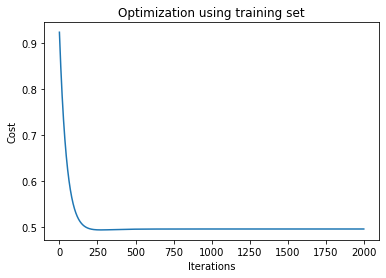

In [40]:
#plot_costs: plot the costs as a function of iteration.
plt.plot(x,y)
plt.title('Optimization using training set')
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [63]:
#Predict y for train set and calculate the cost
y_train_predict = predict_y(b, x_train, init_w)
print(y_train_predict)
y_train_cost = compute_cost(y_train, y_train_predict)
print("cost", y_train_cost)

[0.98498078 0.97476632 0.98434573 0.97791615 0.96512102 0.97298346
 0.97091178 1.00204848 0.96818146 0.97502969 0.98481199 0.98239018
 0.9769011  0.9793223  0.98304585 0.96713459 0.99166403 0.96569183
 0.97080656 0.97513994 0.96928938 0.96454374 0.98192844 0.98823918
 0.98961205 0.98306752 0.98122214 0.98910488 0.98185955 0.99363651
 0.98329182 0.97927049 0.97184552 0.98546012 0.96798718 0.98655984
 0.98288081 0.99602764 0.97670944 1.00026933 0.96940614 0.99415566
 1.00539942 0.98628809 0.9840968  0.98351398 0.97839187 0.97679401
 0.98528694 0.98359098 0.98188491 0.96863465 0.99159253 0.97010672
 0.98865274 0.97458382 0.96717948 0.98521396 0.97747628 0.98021086
 0.97524623 0.9973588  1.00298488 0.99009819 0.98894719 0.98164046
 0.98713796 0.97348638 0.98523384 0.98998809 0.98529956 0.96096768
 0.96249836 0.98662702 0.98170282 0.98475074 0.98889281 1.00015928
 0.98185959 0.99332089 0.98951786 0.99435297 0.97229792 0.98137588
 0.97977519 0.97266134 0.99125597 0.99217011 0.99567184 0.9923

In [64]:
#Predict y for test set and calculate the cost

y_test_predict = predict_y(b, x_test, init_w)
print(y_test_predict)

y_test_cost = compute_cost(y_test, y_test_predict)
print("cost", y_test_cost)

[0.98790279 0.99668502 0.99610049 0.97690616 0.99407871 0.98206732
 0.99430611 0.96751228 0.9777351  0.98315362 0.96934884 0.96690786
 0.98609397 0.9700203  0.97193101 0.97748698 0.97277618 0.98349697
 0.9743519  0.98799618 0.99571047 0.9884041  0.97690875 0.99885773
 0.96636052 0.96441273 0.9943731  0.974994   0.97136522 0.96847288
 0.9764365  0.97247428 0.99835224 0.9844911  0.98894048 0.99008843
 0.97996646 0.99647953 0.97279215 0.96208738 0.97182616 0.97564773
 0.97448013 0.96887969 0.9777372  0.96304843 0.97317362 0.98017043
 0.97130003 0.97550219]
cost 0.3807330178449539


In [94]:
#scatter plot for predicted y and actual y for both the train and test set. provide r2 score
r2_score_train = r2_score(y_train, y_train_predict)
print("r2 score for train set: ", r2_score_train)

r2_score_test = r2_score(y_test, y_test_predict)
print("r2 score for test set: ", r2_score_test)


r2 score for train set:  -0.8517145524824026
r2 score for test set:  -1.2877022193629633


iteration:  0 cost:  0.9242330054792715  weights:  [-0.00936325  0.00684619  0.00563712  0.00221422]
iteration:  1 cost:  0.9150862303868056  weights:  [-0.00926962  0.00677773  0.00558074  0.00219207]
iteration:  2 cost:  0.9061276919688347  weights:  [-0.00917692  0.00670995  0.00552494  0.00217015]
iteration:  3 cost:  0.8973535821570351  weights:  [-0.00908515  0.00664285  0.00546969  0.00214845]
iteration:  4 cost:  0.888760169285227  weights:  [-0.0089943   0.00657642  0.00541499  0.00212697]
iteration:  5 cost:  0.8803437965627573  weights:  [-0.00890436  0.00651066  0.00536084  0.0021057 ]
iteration:  6 cost:  0.8721008805783225  weights:  [-0.00881532  0.00644555  0.00530723  0.00208464]
iteration:  7 cost:  0.8640279098336272  weights:  [-0.00872716  0.0063811   0.00525416  0.00206379]
iteration:  8 cost:  0.8561214433062836  weights:  [-0.00863989  0.00631729  0.00520162  0.00204316]
iteration:  9 cost:  0.8483781090413718  weights:  [-0.00855349  0.00625411  0.0051496   0.0

iteration:  259 cost:  0.4938755281565985  weights:  [-0.00069333  0.00050695  0.00041742  0.00016396]
iteration:  260 cost:  0.49386842453197394  weights:  [-0.0006864   0.00050188  0.00041324  0.00016232]
iteration:  261 cost:  0.4938619225429433  weights:  [-0.00067954  0.00049686  0.00040911  0.0001607 ]
iteration:  262 cost:  0.49385600561422366  weights:  [-0.00067274  0.00049189  0.00040502  0.00015909]
iteration:  263 cost:  0.4938506575464074  weights:  [-0.00066601  0.00048697  0.00040097  0.0001575 ]
iteration:  264 cost:  0.49384586250802215  weights:  [-0.00065935  0.0004821   0.00039696  0.00015592]
iteration:  265 cost:  0.49384160502775376  weights:  [-0.00065276  0.00047728  0.00039299  0.00015436]
iteration:  266 cost:  0.49383786998682694  weights:  [-0.00064623  0.00047251  0.00038906  0.00015282]
iteration:  267 cost:  0.493834642611544  weights:  [-0.00063977  0.00046778  0.00038517  0.00015129]
iteration:  268 cost:  0.49383190846597547  weights:  [-0.00063337  0

iteration:  396 cost:  0.4948297348504131  weights:  [-1.74970071e-04  1.27934022e-04  1.05340169e-04  4.13768296e-05]
iteration:  397 cost:  0.49483805436730904  weights:  [-1.73220370e-04  1.26654682e-04  1.04286768e-04  4.09630613e-05]
iteration:  398 cost:  0.49484632448073496  weights:  [-1.71488166e-04  1.25388135e-04  1.03243900e-04  4.05534307e-05]
iteration:  399 cost:  0.4948545450122712  weights:  [-1.69773285e-04  1.24134254e-04  1.02211461e-04  4.01478964e-05]
iteration:  400 cost:  0.49486271579866364  weights:  [-1.68075552e-04  1.22892911e-04  1.01189346e-04  3.97464174e-05]
iteration:  401 cost:  0.4948708366914061  weights:  [-1.66394796e-04  1.21663982e-04  1.00177453e-04  3.93489532e-05]
iteration:  402 cost:  0.4948789075563324  weights:  [-1.64730848e-04  1.20447342e-04  9.91756783e-05  3.89554637e-05]
iteration:  403 cost:  0.4948869282732166  weights:  [-1.63083540e-04  1.19242869e-04  9.81839215e-05  3.85659091e-05]
iteration:  404 cost:  0.4948948987353827  we

iteration:  587 cost:  0.49566310587063367  weights:  [-2.56617303e-05  1.87632568e-05  1.54495623e-05  6.06847237e-06]
iteration:  588 cost:  0.4956647532267361  weights:  [-2.54051130e-05  1.85756242e-05  1.52950667e-05  6.00778764e-06]
iteration:  589 cost:  0.49566638483614345  weights:  [-2.51510618e-05  1.83898680e-05  1.51421160e-05  5.94770977e-06]
iteration:  590 cost:  0.49566800084185825  weights:  [-2.48995512e-05  1.82059693e-05  1.49906948e-05  5.88823267e-06]
iteration:  591 cost:  0.49566960138574045  weights:  [-2.46505557e-05  1.80239096e-05  1.48407879e-05  5.82935034e-06]
iteration:  592 cost:  0.4956711866085138  weights:  [-2.44040502e-05  1.78436705e-05  1.46923800e-05  5.77105684e-06]
iteration:  593 cost:  0.495672756649771  weights:  [-2.41600097e-05  1.76652338e-05  1.45454562e-05  5.71334627e-06]
iteration:  594 cost:  0.4956743116479804  weights:  [-2.39184096e-05  1.74885814e-05  1.44000017e-05  5.65621281e-06]
iteration:  595 cost:  0.49567585174049084  w

iteration:  754 cost:  0.4957995006761348  weights:  [-4.79030795e-06  3.50256109e-06  2.88398952e-06  1.13280948e-06]
iteration:  755 cost:  0.49579981933732425  weights:  [-4.74240487e-06  3.46753548e-06  2.85514962e-06  1.12148139e-06]
iteration:  756 cost:  0.49580013483723046  weights:  [-4.69498083e-06  3.43286013e-06  2.82659813e-06  1.11026658e-06]
iteration:  757 cost:  0.4958004472069621  weights:  [-4.64803102e-06  3.39853153e-06  2.79833215e-06  1.09916391e-06]
iteration:  758 cost:  0.49580075647732674  weights:  [-4.60155071e-06  3.36454621e-06  2.77034883e-06  1.08817227e-06]
iteration:  759 cost:  0.49580106267883384  weights:  [-4.55553520e-06  3.33090075e-06  2.74264534e-06  1.07729055e-06]
iteration:  760 cost:  0.4958013658416978  weights:  [-4.50997985e-06  3.29759174e-06  2.71521888e-06  1.06651764e-06]
iteration:  761 cost:  0.49580166599583986  weights:  [-4.46488005e-06  3.26461583e-06  2.68806669e-06  1.05585247e-06]
iteration:  762 cost:  0.49580196317089115 

iteration:  963 cost:  0.4958275645047399  weights:  [-5.86298934e-07  4.28688063e-07  3.52979390e-07  1.38647661e-07]
iteration:  964 cost:  0.49582760378136553  weights:  [-5.80435945e-07  4.24401182e-07  3.49449596e-07  1.37261184e-07]
iteration:  965 cost:  0.4958276426656045  weights:  [-5.74631585e-07  4.20157170e-07  3.45955100e-07  1.35888573e-07]
iteration:  966 cost:  0.4958276811613729  weights:  [-5.68885269e-07  4.15955599e-07  3.42495549e-07  1.34529687e-07]
iteration:  967 cost:  0.4958277192725481  weights:  [-5.63196417e-07  4.11796043e-07  3.39070594e-07  1.33184390e-07]
iteration:  968 cost:  0.49582775700296866  weights:  [-5.57564453e-07  4.07678082e-07  3.35679888e-07  1.31852546e-07]
iteration:  969 cost:  0.49582779435643537  weights:  [-5.51988808e-07  4.03601301e-07  3.32323089e-07  1.30534021e-07]
iteration:  970 cost:  0.4958278313367104  weights:  [-5.46468920e-07  3.99565288e-07  3.28999858e-07  1.29228680e-07]
iteration:  971 cost:  0.49582786794751893  w

Text(0, 0.5, 'Cost')

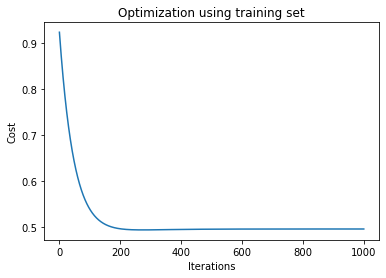

In [99]:
x1, y1 = grad_descent(x_train, y_train, init_w, 1, 0.01, 1000)
plt.plot(x1,y1)
plt.title('Optimization using training set')
plt.xlabel('Iterations')
plt.ylabel('Cost')


iteration:  0 cost:  0.9242330054792715  weights:  [-0.00936325  0.00684619  0.00563712  0.00221422]
iteration:  1 cost:  0.9150862303868056  weights:  [-0.00926962  0.00677773  0.00558074  0.00219207]
iteration:  2 cost:  0.9061276919688347  weights:  [-0.00917692  0.00670995  0.00552494  0.00217015]
iteration:  3 cost:  0.8973535821570351  weights:  [-0.00908515  0.00664285  0.00546969  0.00214845]
iteration:  4 cost:  0.888760169285227  weights:  [-0.0089943   0.00657642  0.00541499  0.00212697]
iteration:  5 cost:  0.8803437965627573  weights:  [-0.00890436  0.00651066  0.00536084  0.0021057 ]
iteration:  6 cost:  0.8721008805783225  weights:  [-0.00881532  0.00644555  0.00530723  0.00208464]
iteration:  7 cost:  0.8640279098336272  weights:  [-0.00872716  0.0063811   0.00525416  0.00206379]
iteration:  8 cost:  0.8561214433062836  weights:  [-0.00863989  0.00631729  0.00520162  0.00204316]
iteration:  9 cost:  0.8483781090413718  weights:  [-0.00855349  0.00625411  0.0051496   0.0

iteration:  169 cost:  0.5007858941170017  weights:  [-0.00171307  0.00125256  0.00103135  0.00040511]
iteration:  170 cost:  0.5005735785258759  weights:  [-0.00169594  0.00124003  0.00102103  0.00040105]
iteration:  171 cost:  0.5003666252453164  weights:  [-0.00167898  0.00122763  0.00101082  0.00039704]
iteration:  172 cost:  0.5001649161930395  weights:  [-0.00166219  0.00121535  0.00100072  0.00039307]
iteration:  173 cost:  0.4999683357503228  weights:  [-0.00164557  0.0012032   0.00099071  0.00038914]
iteration:  174 cost:  0.4997767707118415  weights:  [-0.00162911  0.00119117  0.0009808   0.00038525]
iteration:  175 cost:  0.49959011023651717  weights:  [-0.00161282  0.00117926  0.00097099  0.0003814 ]
iteration:  176 cost:  0.4994082457993541  weights:  [-0.00159669  0.00116746  0.00096128  0.00037758]
iteration:  177 cost:  0.49923107114424586  weights:  [-0.00158072  0.00115579  0.00095167  0.00037381]
iteration:  178 cost:  0.499058482237732  weights:  [-0.00156492  0.001

iteration:  327 cost:  0.4941707035291904  weights:  [-3.50054239e-04  2.55951469e-04  2.10749030e-04  8.27806407e-05]
iteration:  328 cost:  0.49418051470334556  weights:  [-3.46553696e-04  2.53391954e-04  2.08641540e-04  8.19528343e-05]
iteration:  329 cost:  0.4941903630207121  weights:  [-3.43088159e-04  2.50858035e-04  2.06555124e-04  8.11333060e-05]
iteration:  330 cost:  0.494200245418284  weights:  [-3.39657278e-04  2.48349454e-04  2.04489573e-04  8.03219729e-05]
iteration:  331 cost:  0.4942101589172482  weights:  [-3.36260705e-04  2.45865960e-04  2.02444677e-04  7.95187532e-05]
iteration:  332 cost:  0.49422010062107574  weights:  [-3.32898098e-04  2.43407300e-04  2.00420231e-04  7.87235656e-05]
iteration:  333 cost:  0.494230067713655  weights:  [-3.29569117e-04  2.40973227e-04  1.98416028e-04  7.79363300e-05]
iteration:  334 cost:  0.4942400574574634  weights:  [-3.26273426e-04  2.38563495e-04  1.96431868e-04  7.71569667e-05]
iteration:  335 cost:  0.4942500671917776  weigh

iteration:  552 cost:  0.4955943295657723  weights:  [-3.64799408e-05  2.66732792e-05  2.19626312e-05  8.62675706e-06]
iteration:  553 cost:  0.49559662739703614  weights:  [-3.61151414e-05  2.64065464e-05  2.17430049e-05  8.54048949e-06]
iteration:  554 cost:  0.4955989037188823  weights:  [-3.57539900e-05  2.61424809e-05  2.15255748e-05  8.45508459e-06]
iteration:  555 cost:  0.495601158717174  weights:  [-3.53964501e-05  2.58810561e-05  2.13103191e-05  8.37053375e-06]
iteration:  556 cost:  0.4956033925764975  weights:  [-3.50424856e-05  2.56222456e-05  2.10972159e-05  8.28682841e-06]
iteration:  557 cost:  0.4956056054801631  weights:  [-3.46920607e-05  2.53660231e-05  2.08862437e-05  8.20396013e-06]
iteration:  558 cost:  0.4956077976102071  weights:  [-3.43451401e-05  2.51123629e-05  2.06773813e-05  8.12192053e-06]
iteration:  559 cost:  0.495609969147393  weights:  [-3.40016887e-05  2.48612392e-05  2.04706075e-05  8.04070132e-06]
iteration:  560 cost:  0.4956121202712133  weight

iteration:  762 cost:  0.49580196317089115  weights:  [-4.42023125e-06  3.23196967e-06  2.66118603e-06  1.04529394e-06]
iteration:  763 cost:  0.49580225739619604  weights:  [-4.37602894e-06  3.19964997e-06  2.63457417e-06  1.03484100e-06]
iteration:  764 cost:  0.49580254870081397  weights:  [-4.33226865e-06  3.16765347e-06  2.60822843e-06  1.02449259e-06]
iteration:  765 cost:  0.49580283711352263  weights:  [-4.28894596e-06  3.13597694e-06  2.58214614e-06  1.01424767e-06]
iteration:  766 cost:  0.4958031226628206  weights:  [-4.24605650e-06  3.10461717e-06  2.55632468e-06  1.00410519e-06]
iteration:  767 cost:  0.49580340537692974  weights:  [-4.20359594e-06  3.07357100e-06  2.53076143e-06  9.94064138e-07]
iteration:  768 cost:  0.4958036852837978  weights:  [-4.16155998e-06  3.04283529e-06  2.50545382e-06  9.84123497e-07]
iteration:  769 cost:  0.49580396241110114  weights:  [-4.11994438e-06  3.01240693e-06  2.48039928e-06  9.74282262e-07]
iteration:  770 cost:  0.49580423678624735

iteration:  994 cost:  0.4958286160596333  weights:  [-4.29348685e-07  3.13929713e-07  2.58487997e-07  1.01532149e-07]
iteration:  995 cost:  0.4958286448295517  weights:  [-4.25055198e-07  3.10790416e-07  2.55903117e-07  1.00516828e-07]
iteration:  996 cost:  0.49582867331197455  weights:  [-4.20804646e-07  3.07682512e-07  2.53344086e-07  9.95116596e-08]
iteration:  997 cost:  0.49582870150977254  weights:  [-4.16596600e-07  3.04605686e-07  2.50810645e-07  9.85165430e-08]
iteration:  998 cost:  0.49582872942578804  weights:  [-4.12430634e-07  3.01559630e-07  2.48302539e-07  9.75313776e-08]
iteration:  999 cost:  0.4958287570628348  weights:  [-4.08306327e-07  2.98544033e-07  2.45819513e-07  9.65560638e-08]
iteration:  1000 cost:  0.495828784423699  weights:  [-4.04223264e-07  2.95558593e-07  2.43361318e-07  9.55905032e-08]
iteration:  1001 cost:  0.49582881151113856  weights:  [-4.00181031e-07  2.92603007e-07  2.40927705e-07  9.46345981e-08]
iteration:  1002 cost:  0.495828838327884  

iteration:  1178 cost:  0.4958310410720099  weights:  [-6.75594248e-08  4.93978707e-08  4.06739347e-08  1.59764169e-08]
iteration:  1179 cost:  0.49583104560177627  weights:  [-6.68838305e-08  4.89038920e-08  4.02671954e-08  1.58166528e-08]
iteration:  1180 cost:  0.49583105008624995  weights:  [-6.62149922e-08  4.84148530e-08  3.98645234e-08  1.56584862e-08]
iteration:  1181 cost:  0.4958310545258837  weights:  [-6.55528423e-08  4.79307045e-08  3.94658782e-08  1.55019014e-08]
iteration:  1182 cost:  0.49583105892112606  weights:  [-6.48973139e-08  4.74513975e-08  3.90712194e-08  1.53468824e-08]
iteration:  1183 cost:  0.4958310632724207  weights:  [-6.42483407e-08  4.69768835e-08  3.86805072e-08  1.51934135e-08]
iteration:  1184 cost:  0.49583106758020695  weights:  [-6.36058573e-08  4.65071147e-08  3.82937021e-08  1.50414794e-08]
iteration:  1185 cost:  0.4958310718449201  weights:  [-6.29697987e-08  4.60420435e-08  3.79107651e-08  1.48910646e-08]
iteration:  1186 cost:  0.4958310760

iteration:  1398 cost:  0.49583144443018645  weights:  [-7.40335806e-09  5.41316220e-09  4.45716795e-09  1.75074219e-09]
iteration:  1399 cost:  0.49583144492662107  weights:  [-7.32932448e-09  5.35903057e-09  4.41259627e-09  1.73323477e-09]
iteration:  1400 cost:  0.4958314454180913  weights:  [-7.25603124e-09  5.30544027e-09  4.36847030e-09  1.71590242e-09]
iteration:  1401 cost:  0.49583144590464695  weights:  [-7.18347093e-09  5.25238587e-09  4.32478560e-09  1.69874340e-09]
iteration:  1402 cost:  0.4958314463863372  weights:  [-7.11163622e-09  5.19986201e-09  4.28153774e-09  1.68175596e-09]
iteration:  1403 cost:  0.4958314468632104  weights:  [-7.04051985e-09  5.14786339e-09  4.23872237e-09  1.66493840e-09]
iteration:  1404 cost:  0.49583144733531526  weights:  [-6.97011466e-09  5.09638475e-09  4.19633514e-09  1.64828902e-09]
iteration:  1405 cost:  0.49583144780269883  weights:  [-6.90041351e-09  5.04542091e-09  4.15437179e-09  1.63180613e-09]
iteration:  1406 cost:  0.495831448

iteration:  1637 cost:  0.49583148957947876  weights:  [-6.70255310e-10  4.90075000e-10  4.03525057e-10  1.58501620e-10]
iteration:  1638 cost:  0.4958314896244233  weights:  [-6.63552757e-10  4.85174250e-10  3.99489806e-10  1.56916604e-10]
iteration:  1639 cost:  0.49583148966891866  weights:  [-6.56917229e-10  4.80322508e-10  3.95494908e-10  1.55347438e-10]
iteration:  1640 cost:  0.4958314897129691  weights:  [-6.50348057e-10  4.75519283e-10  3.91539959e-10  1.53793964e-10]
iteration:  1641 cost:  0.49583148975657876  weights:  [-6.43844577e-10  4.70764090e-10  3.87624560e-10  1.52256024e-10]
iteration:  1642 cost:  0.4958314897997523  weights:  [-6.37406131e-10  4.66056449e-10  3.83748314e-10  1.50733464e-10]
iteration:  1643 cost:  0.49583148984249437  weights:  [-6.31032069e-10  4.61395885e-10  3.79910831e-10  1.49226129e-10]
iteration:  1644 cost:  0.495831489884809  weights:  [-6.24721749e-10  4.56781926e-10  3.76111723e-10  1.47733868e-10]
iteration:  1645 cost:  0.49583148992

iteration:  1843 cost:  0.49583149350702116  weights:  [-8.45454715e-11  6.18176706e-11  5.09003296e-11  1.99932683e-11]
iteration:  1844 cost:  0.4958314935126905  weights:  [-8.37000168e-11  6.11994939e-11  5.03913263e-11  1.97933356e-11]
iteration:  1845 cost:  0.4958314935183031  weights:  [-8.28630166e-11  6.05874990e-11  4.98874130e-11  1.95954022e-11]
iteration:  1846 cost:  0.4958314935238595  weights:  [-8.20343864e-11  5.99816240e-11  4.93885389e-11  1.93994482e-11]
iteration:  1847 cost:  0.49583149352936035  weights:  [-8.12140426e-11  5.93818077e-11  4.88946535e-11  1.92054537e-11]
iteration:  1848 cost:  0.4958314935348064  weights:  [-8.04019022e-11  5.87879897e-11  4.84057070e-11  1.90133992e-11]
iteration:  1849 cost:  0.4958314935401978  weights:  [-7.95978831e-11  5.82001098e-11  4.79216499e-11  1.88232652e-11]
iteration:  1850 cost:  0.4958314935455353  weights:  [-7.88019043e-11  5.76181087e-11  4.74424334e-11  1.86350325e-11]
iteration:  1851 cost:  0.495831493550

Text(0, 0.5, 'Cost')

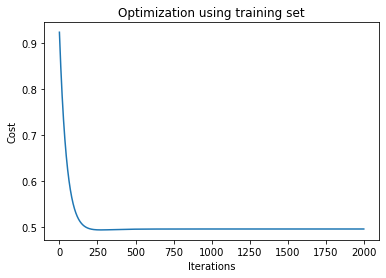

In [96]:
x2, y2 = grad_descent(x_train, y_train, init_w, 1, 0.01, 2000)
plt.plot(x2,y2)
plt.title('Optimization using training set')
plt.xlabel('Iterations')
plt.ylabel('Cost')

iteration:  0 cost:  0.9242330054792715  weights:  [-0.00936325  0.00684619  0.00563712  0.00221422]
iteration:  1 cost:  0.9150862303868056  weights:  [-0.00926962  0.00677773  0.00558074  0.00219207]
iteration:  2 cost:  0.9061276919688347  weights:  [-0.00917692  0.00670995  0.00552494  0.00217015]
iteration:  3 cost:  0.8973535821570351  weights:  [-0.00908515  0.00664285  0.00546969  0.00214845]
iteration:  4 cost:  0.888760169285227  weights:  [-0.0089943   0.00657642  0.00541499  0.00212697]
iteration:  5 cost:  0.8803437965627573  weights:  [-0.00890436  0.00651066  0.00536084  0.0021057 ]
iteration:  6 cost:  0.8721008805783225  weights:  [-0.00881532  0.00644555  0.00530723  0.00208464]
iteration:  7 cost:  0.8640279098336272  weights:  [-0.00872716  0.0063811   0.00525416  0.00206379]
iteration:  8 cost:  0.8561214433062836  weights:  [-0.00863989  0.00631729  0.00520162  0.00204316]
iteration:  9 cost:  0.8483781090413718  weights:  [-0.00855349  0.00625411  0.0051496   0.0

Text(0, 0.5, 'Cost')

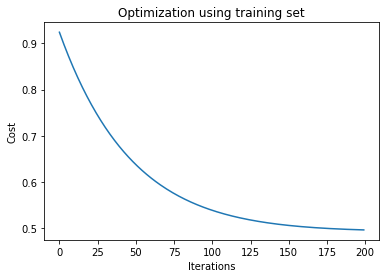

In [103]:
x3, y3 = grad_descent(x_train, y_train, init_w, 1, 0.01, 200)
plt.plot(x3,y3)
plt.title('Optimization using training set')
plt.xlabel('Iterations')
plt.ylabel('Cost')

iteration:  0 cost:  0.9242330054792715  weights:  [-0.00936325  0.00684619  0.00563712  0.00221422]
iteration:  1 cost:  0.9150862303868056  weights:  [-0.00926962  0.00677773  0.00558074  0.00219207]
iteration:  2 cost:  0.9061276919688347  weights:  [-0.00917692  0.00670995  0.00552494  0.00217015]
iteration:  3 cost:  0.8973535821570351  weights:  [-0.00908515  0.00664285  0.00546969  0.00214845]
iteration:  4 cost:  0.888760169285227  weights:  [-0.0089943   0.00657642  0.00541499  0.00212697]
iteration:  5 cost:  0.8803437965627573  weights:  [-0.00890436  0.00651066  0.00536084  0.0021057 ]
iteration:  6 cost:  0.8721008805783225  weights:  [-0.00881532  0.00644555  0.00530723  0.00208464]
iteration:  7 cost:  0.8640279098336272  weights:  [-0.00872716  0.0063811   0.00525416  0.00206379]
iteration:  8 cost:  0.8561214433062836  weights:  [-0.00863989  0.00631729  0.00520162  0.00204316]
iteration:  9 cost:  0.8483781090413718  weights:  [-0.00855349  0.00625411  0.0051496   0.0

iteration:  140 cost:  0.509908433083386  weights:  [-0.00229274  0.00167639  0.00138033  0.00054218]
iteration:  141 cost:  0.509476097396402  weights:  [-0.00226981  0.00165963  0.00136653  0.00053676]
iteration:  142 cost:  0.5090538872355962  weights:  [-0.00224711  0.00164303  0.00135287  0.0005314 ]
iteration:  143 cost:  0.5086415858825373  weights:  [-0.00222464  0.0016266   0.00133934  0.00052608]
iteration:  144 cost:  0.5082389810836956  weights:  [-0.00220239  0.00161034  0.00132594  0.00052082]
iteration:  145 cost:  0.5078458649600694  weights:  [-0.00218037  0.00159423  0.00131268  0.00051561]
iteration:  146 cost:  0.5074620339186248  weights:  [-0.00215856  0.00157829  0.00129956  0.00051046]
iteration:  147 cost:  0.5070872885655128  weights:  [-0.00213698  0.00156251  0.00128656  0.00050535]
iteration:  148 cost:  0.5067214336210298  weights:  [-0.00211561  0.00154688  0.0012737   0.0005003 ]
iteration:  149 cost:  0.5063642778362832  weights:  [-0.00209445  0.001531

iteration:  331 cost:  0.4942101589172482  weights:  [-3.36260705e-04  2.45865960e-04  2.02444677e-04  7.95187532e-05]
iteration:  332 cost:  0.49422010062107574  weights:  [-3.32898098e-04  2.43407300e-04  2.00420231e-04  7.87235656e-05]
iteration:  333 cost:  0.494230067713655  weights:  [-3.29569117e-04  2.40973227e-04  1.98416028e-04  7.79363300e-05]
iteration:  334 cost:  0.4942400574574634  weights:  [-3.26273426e-04  2.38563495e-04  1.96431868e-04  7.71569667e-05]
iteration:  335 cost:  0.4942500671917776  weights:  [-3.23010691e-04  2.36177860e-04  1.94467549e-04  7.63853970e-05]
iteration:  336 cost:  0.4942600943309225  weights:  [-3.19780584e-04  2.33816081e-04  1.92522874e-04  7.56215430e-05]
iteration:  337 cost:  0.49427013636255634  weights:  [-3.16582779e-04  2.31477921e-04  1.90597645e-04  7.48653276e-05]
iteration:  338 cost:  0.49428019084599345  weights:  [-3.13416951e-04  2.29163141e-04  1.88691669e-04  7.41166743e-05]
iteration:  339 cost:  0.49429025541056015  we

iteration:  467 cost:  0.49529787881480797  weights:  [-8.57161358e-05  6.26736330e-05  5.16051243e-05  2.02701063e-05]
iteration:  468 cost:  0.49530280744208804  weights:  [-8.48589744e-05  6.20468966e-05  5.10890730e-05  2.00674053e-05]
iteration:  469 cost:  0.4953076948928491  weights:  [-8.40103847e-05  6.14264277e-05  5.05781823e-05  1.98667312e-05]
iteration:  470 cost:  0.4953125414174722  weights:  [-8.31702809e-05  6.08121634e-05  5.00724005e-05  1.96680639e-05]
iteration:  471 cost:  0.495317347267046  weights:  [-8.23385780e-05  6.02040418e-05  4.95716765e-05  1.94713833e-05]
iteration:  472 cost:  0.49532211269329623  weights:  [-8.15151923e-05  5.96020013e-05  4.90759597e-05  1.92766694e-05]
iteration:  473 cost:  0.4953268379485162  weights:  [-8.07000403e-05  5.90059813e-05  4.85852001e-05  1.90839027e-05]
iteration:  474 cost:  0.4953315232854997  weights:  [-7.98930399e-05  5.84159215e-05  4.80993481e-05  1.88930637e-05]
iteration:  475 cost:  0.49533616895747645  we

iteration:  689 cost:  0.4957702363334964  weights:  [-9.20610205e-06  6.73128642e-06  5.54250417e-06  2.17705413e-06]
iteration:  690 cost:  0.49577084421000117  weights:  [-9.11404103e-06  6.66397356e-06  5.48707913e-06  2.15528359e-06]
iteration:  691 cost:  0.49577144610128887  weights:  [-9.02290062e-06  6.59733382e-06  5.43220834e-06  2.13373075e-06]
iteration:  692 cost:  0.49577204206534986  weights:  [-8.93267162e-06  6.53136048e-06  5.37788626e-06  2.11239345e-06]
iteration:  693 cost:  0.4957726321596321  weights:  [-8.84334490e-06  6.46604688e-06  5.32410740e-06  2.09126951e-06]
iteration:  694 cost:  0.49577321644104494  weights:  [-8.75491145e-06  6.40138641e-06  5.27086632e-06  2.07035682e-06]
iteration:  695 cost:  0.4957737949659645  weights:  [-8.66736234e-06  6.33737255e-06  5.21815766e-06  2.04965325e-06]
iteration:  696 cost:  0.495774367790238  weights:  [-8.58068871e-06  6.27399882e-06  5.16597608e-06  2.02915672e-06]
iteration:  697 cost:  0.49577493496918823  w

iteration:  900 cost:  0.4958240956438677  weights:  [-1.10433756e-06  8.07465788e-07  6.64862884e-07  2.61153162e-07]
iteration:  901 cost:  0.49582416956052405  weights:  [-1.09329419e-06  7.99391130e-07  6.58214255e-07  2.58541630e-07]
iteration:  902 cost:  0.4958242427393598  weights:  [-1.08236125e-06  7.91397219e-07  6.51632112e-07  2.55956214e-07]
iteration:  903 cost:  0.49582431518772657  weights:  [-1.07153763e-06  7.83483247e-07  6.45115791e-07  2.53396652e-07]
iteration:  904 cost:  0.49582438691290276  weights:  [-1.06082226e-06  7.75648414e-07  6.38664633e-07  2.50862685e-07]
iteration:  905 cost:  0.49582445792209445  weights:  [-1.05021404e-06  7.67891930e-07  6.32277987e-07  2.48354058e-07]
iteration:  906 cost:  0.49582452822243644  weights:  [-1.03971189e-06  7.60213011e-07  6.25955207e-07  2.45870518e-07]
iteration:  907 cost:  0.4958245978209925  weights:  [-1.02931478e-06  7.52610881e-07  6.19695655e-07  2.43411812e-07]
iteration:  908 cost:  0.49582466672475617 

iteration:  1103 cost:  0.4958305315027007  weights:  [-1.43564264e-07  1.04970831e-07  8.64324040e-08  3.39500010e-08]
iteration:  1104 cost:  0.49583054112727004  weights:  [-1.42128621e-07  1.03921122e-07  8.55680799e-08  3.36105010e-08]
iteration:  1105 cost:  0.4958305506556164  weights:  [-1.40707335e-07  1.02881911e-07  8.47123991e-08  3.32743960e-08]
iteration:  1106 cost:  0.49583056008870147  weights:  [-1.39300262e-07  1.01853092e-07  8.38652751e-08  3.29416520e-08]
iteration:  1107 cost:  0.4958305694274778  weights:  [-1.37907259e-07  1.00834561e-07  8.30266224e-08  3.26122355e-08]
iteration:  1108 cost:  0.49583057867288766  weights:  [-1.36528186e-07  9.98262155e-08  8.21963562e-08  3.22861131e-08]
iteration:  1109 cost:  0.4958305878258643  weights:  [-1.35162905e-07  9.88279533e-08  8.13743926e-08  3.19632520e-08]
iteration:  1110 cost:  0.4958305968873318  weights:  [-1.33811275e-07  9.78396738e-08  8.05606487e-08  3.16436195e-08]
iteration:  1111 cost:  0.49583060585

iteration:  1308 cost:  0.4958313714166964  weights:  [-1.82920020e-08  1.33746839e-08  1.10126411e-08  4.32568294e-09]
iteration:  1309 cost:  0.49583137264325045  weights:  [-1.81090820e-08  1.32409371e-08  1.09025147e-08  4.28242611e-09]
iteration:  1310 cost:  0.49583137385753917  weights:  [-1.79279912e-08  1.31085277e-08  1.07934895e-08  4.23960185e-09]
iteration:  1311 cost:  0.4958313750596856  weights:  [-1.77487113e-08  1.29774424e-08  1.06855546e-08  4.19720583e-09]
iteration:  1312 cost:  0.4958313762498106  weights:  [-1.75712242e-08  1.28476680e-08  1.05786991e-08  4.15523377e-09]
iteration:  1313 cost:  0.495831377428035  weights:  [-1.73955119e-08  1.27191913e-08  1.04729121e-08  4.11368143e-09]
iteration:  1314 cost:  0.4958313785944773  weights:  [-1.72215568e-08  1.25919994e-08  1.03681830e-08  4.07254462e-09]
iteration:  1315 cost:  0.49583137974925556  weights:  [-1.70493412e-08  1.24660794e-08  1.02645011e-08  4.03181917e-09]
iteration:  1316 cost:  0.495831380892

iteration:  1536 cost:  0.4958314816710411  weights:  [-1.84963319e-09  1.35240851e-09  1.11356572e-09  4.37400275e-10]
iteration:  1537 cost:  0.49583148179507003  weights:  [-1.83113685e-09  1.33888442e-09  1.10243006e-09  4.33026272e-10]
iteration:  1538 cost:  0.49583148191785864  weights:  [-1.81282549e-09  1.32549558e-09  1.09140576e-09  4.28696010e-10]
iteration:  1539 cost:  0.49583148203941924  weights:  [-1.79469723e-09  1.31224062e-09  1.08049170e-09  4.24409050e-10]
iteration:  1540 cost:  0.4958314821597645  weights:  [-1.77675026e-09  1.29911822e-09  1.06968679e-09  4.20164959e-10]
iteration:  1541 cost:  0.4958314822789061  weights:  [-1.75898276e-09  1.28612704e-09  1.05898992e-09  4.15963309e-10]
iteration:  1542 cost:  0.4958314823968564  weights:  [-1.74139293e-09  1.27326577e-09  1.04840002e-09  4.11803676e-10]
iteration:  1543 cost:  0.4958314825136273  weights:  [-1.72397900e-09  1.26053311e-09  1.03791602e-09  4.07685640e-10]
iteration:  1544 cost:  0.49583148262

iteration:  1770 cost:  0.4958314928931956  weights:  [-1.76084507e-10  1.28748871e-10  1.06011112e-10  4.16403708e-11]
iteration:  1771 cost:  0.4958314929050033  weights:  [-1.74323662e-10  1.27461383e-10  1.04951001e-10  4.12239670e-11]
iteration:  1772 cost:  0.49583149291669276  weights:  [-1.72580425e-10  1.26186769e-10  1.03901491e-10  4.08117274e-11]
iteration:  1773 cost:  0.4958314929282652  weights:  [-1.70854621e-10  1.24924901e-10  1.02862476e-10  4.04036101e-11]
iteration:  1774 cost:  0.4958314929397221  weights:  [-1.69146074e-10  1.23675652e-10  1.01833851e-10  3.99995740e-11]
iteration:  1775 cost:  0.4958314929510645  weights:  [-1.67454614e-10  1.22438896e-10  1.00815512e-10  3.95995783e-11]
iteration:  1776 cost:  0.49583149296229334  weights:  [-1.65780068e-10  1.21214507e-10  9.98073573e-11  3.92035825e-11]
iteration:  1777 cost:  0.4958314929734098  weights:  [-1.64122267e-10  1.20002362e-10  9.88092837e-11  3.88115467e-11]
iteration:  1778 cost:  0.495831492984

iteration:  1983 cost:  0.4958314939351292  weights:  [-2.07022522e-11  1.51370024e-11  1.24637244e-11  4.89565761e-12]
iteration:  1984 cost:  0.4958314939365173  weights:  [-2.04952296e-11  1.49856324e-11  1.23390872e-11  4.84670104e-12]
iteration:  1985 cost:  0.4958314939378917  weights:  [-2.02902773e-11  1.48357761e-11  1.22156963e-11  4.79823403e-12]
iteration:  1986 cost:  0.49583149393925213  weights:  [-2.00873746e-11  1.46874183e-11  1.20935393e-11  4.75025169e-12]
iteration:  1987 cost:  0.49583149394059933  weights:  [-1.98865008e-11  1.45405441e-11  1.19726040e-11  4.70274917e-12]
iteration:  1988 cost:  0.4958314939419328  weights:  [-1.96876358e-11  1.43951387e-11  1.18528779e-11  4.65572168e-12]
iteration:  1989 cost:  0.4958314939432529  weights:  [-1.94907595e-11  1.42511873e-11  1.17343491e-11  4.60916446e-12]
iteration:  1990 cost:  0.4958314939445599  weights:  [-1.92958519e-11  1.41086754e-11  1.16170056e-11  4.56307282e-12]
iteration:  1991 cost:  0.495831493945

iteration:  2192 cost:  0.4958314940569598  weights:  [-2.53380544e-12  1.85265926e-12  1.52546943e-12  5.99192968e-13]
iteration:  2193 cost:  0.49583149405712956  weights:  [-2.50846739e-12  1.83413266e-12  1.51021474e-12  5.93201038e-13]
iteration:  2194 cost:  0.4958314940572979  weights:  [-2.48338272e-12  1.81579134e-12  1.49511259e-12  5.87269028e-13]
iteration:  2195 cost:  0.4958314940574644  weights:  [-2.45854889e-12  1.79763342e-12  1.48016146e-12  5.81396338e-13]
iteration:  2196 cost:  0.4958314940576292  weights:  [-2.43396340e-12  1.77965709e-12  1.46535985e-12  5.75582374e-13]
iteration:  2197 cost:  0.4958314940577925  weights:  [-2.40962377e-12  1.76186052e-12  1.45070625e-12  5.69826550e-13]
iteration:  2198 cost:  0.495831494057954  weights:  [-2.38552753e-12  1.74424191e-12  1.43619919e-12  5.64128285e-13]
iteration:  2199 cost:  0.495831494058114  weights:  [-2.36167225e-12  1.72679949e-12  1.42183720e-12  5.58487002e-13]
iteration:  2200 cost:  0.495831494058272

iteration:  2401 cost:  0.495831494071871  weights:  [-3.10119401e-13  2.26752050e-13  1.86706389e-13  7.33368714e-14]
iteration:  2402 cost:  0.4958314940718918  weights:  [-3.07018207e-13  2.24484529e-13  1.84839325e-13  7.26035027e-14]
iteration:  2403 cost:  0.4958314940719123  weights:  [-3.03948025e-13  2.22239684e-13  1.82990932e-13  7.18774677e-14]
iteration:  2404 cost:  0.4958314940719328  weights:  [-3.00908544e-13  2.20017287e-13  1.81161023e-13  7.11586930e-14]
iteration:  2405 cost:  0.4958314940719528  weights:  [-2.97899459e-13  2.17817114e-13  1.79349412e-13  7.04471061e-14]
iteration:  2406 cost:  0.4958314940719728  weights:  [-2.94920464e-13  2.15638943e-13  1.77555918e-13  6.97426350e-14]
iteration:  2407 cost:  0.4958314940719926  weights:  [-2.91971260e-13  2.13482554e-13  1.75780359e-13  6.90452087e-14]
iteration:  2408 cost:  0.49583149407201216  weights:  [-2.89051547e-13  2.11347728e-13  1.74022556e-13  6.83547566e-14]
iteration:  2409 cost:  0.49583149407203

iteration:  2600 cost:  0.49583149407366894  weights:  [-4.19693904e-14  3.06870363e-14  2.52675367e-14  9.92489918e-15]
iteration:  2601 cost:  0.4958314940736718  weights:  [-4.15496965e-14  3.03801659e-14  2.50148613e-14  9.82565019e-15]
iteration:  2602 cost:  0.4958314940736746  weights:  [-4.11341995e-14  3.00763642e-14  2.47647127e-14  9.72739368e-15]
iteration:  2603 cost:  0.4958314940736774  weights:  [-4.07228575e-14  2.97756006e-14  2.45170656e-14  9.63011975e-15]
iteration:  2604 cost:  0.4958314940736802  weights:  [-4.03156289e-14  2.94778446e-14  2.42718949e-14  9.53381855e-15]
iteration:  2605 cost:  0.4958314940736829  weights:  [-3.99124726e-14  2.91830661e-14  2.40291760e-14  9.43848036e-15]
iteration:  2606 cost:  0.49583149407368543  weights:  [-3.95133479e-14  2.88912355e-14  2.37888842e-14  9.34409556e-15]
iteration:  2607 cost:  0.49583149407368826  weights:  [-3.91182144e-14  2.86023231e-14  2.35509954e-14  9.25065461e-15]
iteration:  2608 cost:  0.49583149407

iteration:  2748 cost:  0.4958314940738868  weights:  [-9.48290634e-15  6.93367924e-15  5.70915331e-15  2.24251266e-15]
iteration:  2749 cost:  0.4958314940738876  weights:  [-9.38807728e-15  6.86434245e-15  5.65206177e-15  2.22008754e-15]
iteration:  2750 cost:  0.49583149407388816  weights:  [-9.29419651e-15  6.79569902e-15  5.59554116e-15  2.19788666e-15]
iteration:  2751 cost:  0.4958314940738887  weights:  [-9.20125454e-15  6.72774203e-15  5.53958575e-15  2.17590779e-15]
iteration:  2752 cost:  0.4958314940738894  weights:  [-9.10924199e-15  6.66046461e-15  5.48418989e-15  2.15414872e-15]
iteration:  2753 cost:  0.49583149407389004  weights:  [-9.01814957e-15  6.59385997e-15  5.42934799e-15  2.13260723e-15]
iteration:  2754 cost:  0.49583149407389066  weights:  [-8.92796808e-15  6.52792137e-15  5.37505451e-15  2.11128116e-15]
iteration:  2755 cost:  0.4958314940738912  weights:  [-8.83868840e-15  6.46264215e-15  5.32130396e-15  2.09016835e-15]
iteration:  2756 cost:  0.49583149407

iteration:  2938 cost:  0.495831494073941  weights:  [-1.40484508e-15  1.02718985e-15  8.45782469e-16  3.32217020e-16]
iteration:  2939 cost:  0.4958314940739412  weights:  [-1.39079663e-15  1.01691795e-15  8.37324644e-16  3.28894849e-16]
iteration:  2940 cost:  0.4958314940739412  weights:  [-1.37688866e-15  1.00674877e-15  8.28951397e-16  3.25605901e-16]
iteration:  2941 cost:  0.49583149407394134  weights:  [-1.36311978e-15  9.96681287e-16  8.20661883e-16  3.22349842e-16]
iteration:  2942 cost:  0.49583149407394134  weights:  [-1.34948858e-15  9.86714474e-16  8.12455265e-16  3.19126343e-16]
iteration:  2943 cost:  0.4958314940739415  weights:  [-1.33599369e-15  9.76847329e-16  8.04330712e-16  3.15935080e-16]
iteration:  2944 cost:  0.49583149407394167  weights:  [-1.32263376e-15  9.67078856e-16  7.96287405e-16  3.12775729e-16]
iteration:  2945 cost:  0.4958314940739416  weights:  [-1.30940742e-15  9.57408067e-16  7.88324531e-16  3.09647972e-16]
iteration:  2946 cost:  0.495831494073

iteration:  3137 cost:  0.49583149407394916  weights:  [-1.90121906e-16  1.39012689e-16  1.14462283e-16  4.49599275e-17]
iteration:  3138 cost:  0.49583149407394916  weights:  [-1.88220687e-16  1.37622562e-16  1.13317660e-16  4.45103283e-17]
iteration:  3139 cost:  0.4958314940739494  weights:  [-1.86338480e-16  1.36246337e-16  1.12184484e-16  4.40652250e-17]
iteration:  3140 cost:  0.49583149407394916  weights:  [-1.84475095e-16  1.34883873e-16  1.11062639e-16  4.36245727e-17]
iteration:  3141 cost:  0.4958314940739493  weights:  [-1.82630344e-16  1.33535035e-16  1.09952012e-16  4.31883270e-17]
iteration:  3142 cost:  0.4958314940739493  weights:  [-1.80804041e-16  1.32199684e-16  1.08852492e-16  4.27564437e-17]
iteration:  3143 cost:  0.4958314940739494  weights:  [-1.78996001e-16  1.30877688e-16  1.07763967e-16  4.23288793e-17]
iteration:  3144 cost:  0.4958314940739494  weights:  [-1.77206041e-16  1.29568911e-16  1.06686328e-16  4.19055905e-17]
iteration:  3145 cost:  0.49583149407

iteration:  3340 cost:  0.49583149407395033  weights:  [-2.47159133e-17  1.80716975e-17  1.48801362e-17  5.84480607e-18]
iteration:  3341 cost:  0.49583149407395033  weights:  [-2.44687542e-17  1.78909805e-17  1.47313349e-17  5.78635801e-18]
iteration:  3342 cost:  0.49583149407395033  weights:  [-2.42240666e-17  1.77120707e-17  1.45840215e-17  5.72849443e-18]
iteration:  3343 cost:  0.49583149407395033  weights:  [-2.39818260e-17  1.75349500e-17  1.44381813e-17  5.67120948e-18]
iteration:  3344 cost:  0.49583149407395033  weights:  [-2.37420077e-17  1.73596005e-17  1.42937995e-17  5.61449739e-18]
iteration:  3345 cost:  0.49583149407395033  weights:  [-2.35045876e-17  1.71860045e-17  1.41508615e-17  5.55835242e-18]
iteration:  3346 cost:  0.49583149407395033  weights:  [-2.32695417e-17  1.70141445e-17  1.40093529e-17  5.50276889e-18]
iteration:  3347 cost:  0.49583149407395033  weights:  [-2.30368463e-17  1.68440030e-17  1.38692593e-17  5.44774120e-18]
iteration:  3348 cost:  0.495831

iteration:  3550 cost:  0.49583149407395033  weights:  [-2.99479796e-18  2.18972620e-18  1.80300849e-18  7.08208233e-19]
iteration:  3551 cost:  0.49583149407395033  weights:  [-2.96484998e-18  2.16782894e-18  1.78497841e-18  7.01126151e-19]
iteration:  3552 cost:  0.49583149407395033  weights:  [-2.93520148e-18  2.14615065e-18  1.76712862e-18  6.94114889e-19]
iteration:  3553 cost:  0.49583149407395033  weights:  [-2.90584946e-18  2.12468914e-18  1.74945734e-18  6.87173741e-19]
iteration:  3554 cost:  0.49583149407395033  weights:  [-2.87679097e-18  2.10344225e-18  1.73196276e-18  6.80302003e-19]
iteration:  3555 cost:  0.49583149407395033  weights:  [-2.84802306e-18  2.08240783e-18  1.71464314e-18  6.73498983e-19]
iteration:  3556 cost:  0.49583149407395033  weights:  [-2.81954283e-18  2.06158375e-18  1.69749671e-18  6.66763993e-19]
iteration:  3557 cost:  0.49583149407395033  weights:  [-2.79134740e-18  2.04096791e-18  1.68052174e-18  6.60096353e-19]
iteration:  3558 cost:  0.495831

iteration:  3740 cost:  0.4958314940739504  weights:  [-4.43664318e-19  3.24396969e-19  2.67106678e-19  1.04917503e-19]
iteration:  3741 cost:  0.4958314940739504  weights:  [-4.39227675e-19  3.21152999e-19  2.64435611e-19  1.03868328e-19]
iteration:  3742 cost:  0.4958314940739504  weights:  [-4.34835398e-19  3.17941469e-19  2.61791255e-19  1.02829644e-19]
iteration:  3743 cost:  0.4958314940739504  weights:  [-4.30487044e-19  3.14762055e-19  2.59173343e-19  1.01801348e-19]
iteration:  3744 cost:  0.4958314940739504  weights:  [-4.26182174e-19  3.11614434e-19  2.56581609e-19  1.00783335e-19]
iteration:  3745 cost:  0.4958314940739504  weights:  [-4.21920352e-19  3.08498290e-19  2.54015793e-19  9.97755012e-20]
iteration:  3746 cost:  0.4958314940739504  weights:  [-4.17701149e-19  3.05413307e-19  2.51475635e-19  9.87777462e-20]
iteration:  3747 cost:  0.4958314940739504  weights:  [-4.13524137e-19  3.02359174e-19  2.48960879e-19  9.77899687e-20]
iteration:  3748 cost:  0.49583149407395

iteration:  3982 cost:  0.4958314940739504  weights:  [-3.89736961e-20  2.84966547e-20  2.34639886e-20  9.21647899e-21]
iteration:  3983 cost:  0.4958314940739504  weights:  [-3.85839592e-20  2.82116882e-20  2.32293487e-20  9.12431420e-21]
iteration:  3984 cost:  0.4958314940739504  weights:  [-3.81981196e-20  2.79295713e-20  2.29970552e-20  9.03307106e-21]
iteration:  3985 cost:  0.4958314940739504  weights:  [-3.78161384e-20  2.76502756e-20  2.27670847e-20  8.94274035e-21]
iteration:  3986 cost:  0.4958314940739504  weights:  [-3.74379770e-20  2.73737728e-20  2.25394138e-20  8.85331295e-21]
iteration:  3987 cost:  0.4958314940739504  weights:  [-3.70635972e-20  2.71000351e-20  2.23140197e-20  8.76477982e-21]
iteration:  3988 cost:  0.4958314940739504  weights:  [-3.66929612e-20  2.68290347e-20  2.20908795e-20  8.67713202e-21]
iteration:  3989 cost:  0.4958314940739504  weights:  [-3.63260316e-20  2.65607444e-20  2.18699707e-20  8.59036070e-21]
iteration:  3990 cost:  0.49583149407395

iteration:  4202 cost:  0.4958314940739504  weights:  [-4.27085086e-21  3.12274622e-21  2.57125205e-21  1.00996855e-21]
iteration:  4203 cost:  0.4958314940739504  weights:  [-4.22814235e-21  3.09151876e-21  2.54553952e-21  9.99868862e-22]
iteration:  4204 cost:  0.4958314940739504  weights:  [-4.18586093e-21  3.06060357e-21  2.52008413e-21  9.89870173e-22]
iteration:  4205 cost:  0.4958314940739504  weights:  [-4.14400232e-21  3.02999754e-21  2.49488329e-21  9.79971471e-22]
iteration:  4206 cost:  0.4958314940739504  weights:  [-4.10256230e-21  2.99969756e-21  2.46993446e-21  9.70171757e-22]
iteration:  4207 cost:  0.4958314940739504  weights:  [-4.06153667e-21  2.96970059e-21  2.44523511e-21  9.60470039e-22]
iteration:  4208 cost:  0.4958314940739504  weights:  [-4.02092131e-21  2.94000358e-21  2.42078276e-21  9.50865339e-22]
iteration:  4209 cost:  0.4958314940739504  weights:  [-3.98071209e-21  2.91060354e-21  2.39657493e-21  9.41356685e-22]
iteration:  4210 cost:  0.49583149407395

iteration:  4380 cost:  0.4958314940739504  weights:  [-7.13804110e-22  5.21916864e-22  4.29743472e-22  1.68800018e-22]
iteration:  4381 cost:  0.4958314940739504  weights:  [-7.06666069e-22  5.16697696e-22  4.25446037e-22  1.67112017e-22]
iteration:  4382 cost:  0.4958314940739504  weights:  [-6.99599409e-22  5.11530719e-22  4.21191577e-22  1.65440897e-22]
iteration:  4383 cost:  0.4958314940739504  weights:  [-6.92603414e-22  5.06415411e-22  4.16979661e-22  1.63786488e-22]
iteration:  4384 cost:  0.4958314940739504  weights:  [-6.85677380e-22  5.01351257e-22  4.12809865e-22  1.62148623e-22]
iteration:  4385 cost:  0.4958314940739504  weights:  [-6.78820606e-22  4.96337745e-22  4.08681766e-22  1.60527137e-22]
iteration:  4386 cost:  0.4958314940739504  weights:  [-6.72032400e-22  4.91374367e-22  4.04594948e-22  1.58921866e-22]
iteration:  4387 cost:  0.4958314940739504  weights:  [-6.65312076e-22  4.86460624e-22  4.00548999e-22  1.57332647e-22]
iteration:  4388 cost:  0.49583149407395

iteration:  4589 cost:  0.4958314940739504  weights:  [-8.73644436e-23  6.38788371e-23  5.25974827e-23  2.06598973e-23]
iteration:  4590 cost:  0.4958314940739504  weights:  [-8.64907992e-23  6.32400487e-23  5.20715079e-23  2.04532983e-23]
iteration:  4591 cost:  0.4958314940739504  weights:  [-8.56258912e-23  6.26076482e-23  5.15507928e-23  2.02487653e-23]
iteration:  4592 cost:  0.4958314940739504  weights:  [-8.47696323e-23  6.19815717e-23  5.10352849e-23  2.00462777e-23]
iteration:  4593 cost:  0.4958314940739504  weights:  [-8.39219359e-23  6.13617560e-23  5.05249320e-23  1.98458149e-23]
iteration:  4594 cost:  0.4958314940739504  weights:  [-8.30827166e-23  6.07481384e-23  5.00196827e-23  1.96473568e-23]
iteration:  4595 cost:  0.4958314940739504  weights:  [-8.22518894e-23  6.01406571e-23  4.95194859e-23  1.94508832e-23]
iteration:  4596 cost:  0.4958314940739504  weights:  [-8.14293705e-23  5.95392505e-23  4.90242910e-23  1.92563744e-23]
iteration:  4597 cost:  0.49583149407395

iteration:  4800 cost:  0.4958314940739504  weights:  [-1.04799878e-23  7.66272185e-24  6.30944297e-24  2.47830195e-24]
iteration:  4801 cost:  0.4958314940739504  weights:  [-1.03751879e-23  7.58609463e-24  6.24634854e-24  2.45351893e-24]
iteration:  4802 cost:  0.4958314940739504  weights:  [-1.02714360e-23  7.51023368e-24  6.18388506e-24  2.42898374e-24]
iteration:  4803 cost:  0.4958314940739504  weights:  [-1.01687216e-23  7.43513134e-24  6.12204621e-24  2.40469390e-24]
iteration:  4804 cost:  0.4958314940739504  weights:  [-1.00670344e-23  7.36078003e-24  6.06082575e-24  2.38064696e-24]
iteration:  4805 cost:  0.4958314940739504  weights:  [-9.96636408e-24  7.28717223e-24  6.00021749e-24  2.35684049e-24]
iteration:  4806 cost:  0.4958314940739504  weights:  [-9.86670044e-24  7.21430051e-24  5.94021531e-24  2.33327209e-24]
iteration:  4807 cost:  0.4958314940739504  weights:  [-9.76803344e-24  7.14215750e-24  5.88081316e-24  2.30993937e-24]
iteration:  4808 cost:  0.49583149407395

iteration:  4998 cost:  0.4958314940739504  weights:  [-1.43261438e-24  1.04749411e-24  8.62500886e-25  3.38783889e-25]
iteration:  4999 cost:  0.4958314940739504  weights:  [-1.41828823e-24  1.03701917e-24  8.53875877e-25  3.35396050e-25]
iteration:  5000 cost:  0.4958314940739504  weights:  [-1.40410535e-24  1.02664898e-24  8.45337118e-25  3.32042089e-25]
iteration:  5001 cost:  0.4958314940739504  weights:  [-1.39006430e-24  1.01638249e-24  8.36883747e-25  3.28721668e-25]
iteration:  5002 cost:  0.4958314940739504  weights:  [-1.37616366e-24  1.00621867e-24  8.28514910e-25  3.25434452e-25]
iteration:  5003 cost:  0.4958314940739504  weights:  [-1.36240202e-24  9.96156480e-25  8.20229760e-25  3.22180107e-25]
iteration:  5004 cost:  0.4958314940739504  weights:  [-1.34877800e-24  9.86194915e-25  8.12027463e-25  3.18958306e-25]
iteration:  5005 cost:  0.4958314940739504  weights:  [-1.33529022e-24  9.76332966e-25  8.03907188e-25  3.15768723e-25]
iteration:  5006 cost:  0.49583149407395

iteration:  5185 cost:  0.4958314940739504  weights:  [-2.18731180e-25  1.59931121e-25  1.31686404e-25  5.17254334e-26]
iteration:  5186 cost:  0.4958314940739504  weights:  [-2.16543868e-25  1.58331810e-25  1.30369540e-25  5.12081791e-26]
iteration:  5187 cost:  0.4958314940739504  weights:  [-2.14378429e-25  1.56748492e-25  1.29065845e-25  5.06960973e-26]
iteration:  5188 cost:  0.4958314940739504  weights:  [-2.12234645e-25  1.55181007e-25  1.27775186e-25  5.01891363e-26]
iteration:  5189 cost:  0.4958314940739504  weights:  [-2.10112299e-25  1.53629197e-25  1.26497435e-25  4.96872450e-26]
iteration:  5190 cost:  0.4958314940739504  weights:  [-2.08011176e-25  1.52092905e-25  1.25232460e-25  4.91903725e-26]
iteration:  5191 cost:  0.4958314940739504  weights:  [-2.05931064e-25  1.50571976e-25  1.23980136e-25  4.86984688e-26]
iteration:  5192 cost:  0.4958314940739504  weights:  [-2.03871753e-25  1.49066256e-25  1.22740334e-25  4.82114841e-26]
iteration:  5193 cost:  0.49583149407395

iteration:  5371 cost:  0.4958314940739504  weights:  [-3.37331495e-26  2.46648896e-26  2.03089343e-26  7.97719730e-27]
iteration:  5372 cost:  0.4958314940739504  weights:  [-3.33958180e-26  2.44182407e-26  2.01058450e-26  7.89742533e-27]
iteration:  5373 cost:  0.4958314940739504  weights:  [-3.30618598e-26  2.41740583e-26  1.99047865e-26  7.81845107e-27]
iteration:  5374 cost:  0.4958314940739504  weights:  [-3.27312412e-26  2.39323177e-26  1.97057386e-26  7.74026656e-27]
iteration:  5375 cost:  0.4958314940739504  weights:  [-3.24039288e-26  2.36929946e-26  1.95086813e-26  7.66286390e-27]
iteration:  5376 cost:  0.4958314940739504  weights:  [-3.20798895e-26  2.34560646e-26  1.93135944e-26  7.58623526e-27]
iteration:  5377 cost:  0.4958314940739504  weights:  [-3.17590906e-26  2.32215040e-26  1.91204585e-26  7.51037290e-27]
iteration:  5378 cost:  0.4958314940739504  weights:  [-3.14414997e-26  2.29892889e-26  1.89292539e-26  7.43526918e-27]
iteration:  5379 cost:  0.49583149407395

iteration:  5571 cost:  0.4958314940739504  weights:  [-4.51955640e-27  3.30459389e-27  2.72098441e-27  1.06878230e-27]
iteration:  5572 cost:  0.4958314940739504  weights:  [-4.47436083e-27  3.27154795e-27  2.69377457e-27  1.05809448e-27]
iteration:  5573 cost:  0.4958314940739504  weights:  [-4.42961723e-27  3.23883247e-27  2.66683682e-27  1.04751353e-27]
iteration:  5574 cost:  0.4958314940739504  weights:  [-4.38532105e-27  3.20644415e-27  2.64016846e-27  1.03703840e-27]
iteration:  5575 cost:  0.4958314940739504  weights:  [-4.34146784e-27  3.17437971e-27  2.61376677e-27  1.02666801e-27]
iteration:  5576 cost:  0.4958314940739504  weights:  [-4.29805316e-27  3.14263591e-27  2.58762910e-27  1.01640133e-27]
iteration:  5577 cost:  0.4958314940739504  weights:  [-4.25507263e-27  3.11120955e-27  2.56175281e-27  1.00623732e-27]
iteration:  5578 cost:  0.4958314940739504  weights:  [-4.21252191e-27  3.08009746e-27  2.53613528e-27  9.96174947e-28]
iteration:  5579 cost:  0.49583149407395

iteration:  5770 cost:  0.4958314940739504  weights:  [-6.11645148e-28  4.47220621e-28  3.68238997e-28  1.44641520e-28]
iteration:  5771 cost:  0.4958314940739504  weights:  [-6.05528697e-28  4.42748415e-28  3.64556607e-28  1.43195105e-28]
iteration:  5772 cost:  0.4958314940739504  weights:  [-5.99473410e-28  4.38320931e-28  3.60911041e-28  1.41763154e-28]
iteration:  5773 cost:  0.4958314940739504  weights:  [-5.93478676e-28  4.33937722e-28  3.57301931e-28  1.40345523e-28]
iteration:  5774 cost:  0.4958314940739504  weights:  [-5.87543889e-28  4.29598344e-28  3.53728911e-28  1.38942067e-28]
iteration:  5775 cost:  0.4958314940739504  weights:  [-5.81668450e-28  4.25302361e-28  3.50191622e-28  1.37552647e-28]
iteration:  5776 cost:  0.4958314940739504  weights:  [-5.75851765e-28  4.21049337e-28  3.46689706e-28  1.36177120e-28]
iteration:  5777 cost:  0.4958314940739504  weights:  [-5.70093248e-28  4.16838844e-28  3.43222809e-28  1.34815349e-28]
iteration:  5778 cost:  0.49583149407395

iteration:  5980 cost:  0.4958314940739504  weights:  [-7.41123186e-29  5.41891933e-29  4.46190834e-29  1.75260418e-29]
iteration:  5981 cost:  0.4958314940739504  weights:  [-7.33711954e-29  5.36473014e-29  4.41728926e-29  1.73507814e-29]
iteration:  5982 cost:  0.4958314940739504  weights:  [-7.26374835e-29  5.31108284e-29  4.37311637e-29  1.71772736e-29]
iteration:  5983 cost:  0.4958314940739504  weights:  [-7.19111087e-29  5.25797201e-29  4.32938520e-29  1.70055008e-29]
iteration:  5984 cost:  0.4958314940739504  weights:  [-7.11919976e-29  5.20539229e-29  4.28609135e-29  1.68354458e-29]
iteration:  5985 cost:  0.4958314940739504  weights:  [-7.04800776e-29  5.15333837e-29  4.24323044e-29  1.66670914e-29]
iteration:  5986 cost:  0.4958314940739504  weights:  [-6.97752768e-29  5.10180498e-29  4.20079813e-29  1.65004205e-29]
iteration:  5987 cost:  0.4958314940739504  weights:  [-6.90775240e-29  5.05078693e-29  4.15879015e-29  1.63354163e-29]
iteration:  5988 cost:  0.49583149407395

Text(0, 0.5, 'Cost')

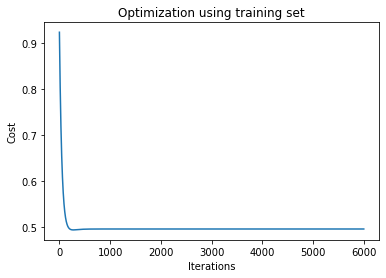

In [98]:
x4, y4 = grad_descent(x_train, y_train, init_w, 1, 0.01, 6000)
plt.plot(x4,y4)
plt.title('Optimization using training set')
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [118]:
x1, y1 = grad_descent(x_train, y_train, init_w, 1, 0.01, 2000)
x2, y2 = grad_descent(x_train, y_train, init_w, 1, 0.001, 2000)
x3, y3 = grad_descent(x_train, y_train, init_w, 1, 0.0001, 2000)
x4, y4 = grad_descent(x_train, y_train, init_w, 1, 0.2, 2000)
x5, y5 = grad_descent(x_train, y_train, init_w, 1, 0.1, 2000)


iteration:  0 cost:  0.9242330054792715  weights:  [-0.00936325  0.00684619  0.00563712  0.00221422]
iteration:  1 cost:  0.9150862303868056  weights:  [-0.00926962  0.00677773  0.00558074  0.00219207]
iteration:  2 cost:  0.9061276919688347  weights:  [-0.00917692  0.00670995  0.00552494  0.00217015]
iteration:  3 cost:  0.8973535821570351  weights:  [-0.00908515  0.00664285  0.00546969  0.00214845]
iteration:  4 cost:  0.888760169285227  weights:  [-0.0089943   0.00657642  0.00541499  0.00212697]
iteration:  5 cost:  0.8803437965627573  weights:  [-0.00890436  0.00651066  0.00536084  0.0021057 ]
iteration:  6 cost:  0.8721008805783225  weights:  [-0.00881532  0.00644555  0.00530723  0.00208464]
iteration:  7 cost:  0.8640279098336272  weights:  [-0.00872716  0.0063811   0.00525416  0.00206379]
iteration:  8 cost:  0.8561214433062836  weights:  [-0.00863989  0.00631729  0.00520162  0.00204316]
iteration:  9 cost:  0.8483781090413718  weights:  [-0.00855349  0.00625411  0.0051496   0.0

iteration:  94 cost:  0.5456656541716722  weights:  [-0.00364028  0.00266169  0.00219162  0.00086085]
iteration:  95 cost:  0.5444322921279853  weights:  [-0.00360388  0.00263507  0.0021697   0.00085224]
iteration:  96 cost:  0.5432258906115451  weights:  [-0.00356784  0.00260872  0.00214801  0.00084372]
iteration:  97 cost:  0.5420458889416336  weights:  [-0.00353216  0.00258263  0.00212653  0.00083528]
iteration:  98 cost:  0.5408917378367417  weights:  [-0.00349684  0.00255681  0.00210526  0.00082693]
iteration:  99 cost:  0.5397628991853072  weights:  [-0.00346187  0.00253124  0.00208421  0.00081866]
iteration:  100 cost:  0.538658845821042  weights:  [-0.00342725  0.00250593  0.00206337  0.00081047]
iteration:  101 cost:  0.5375790613027508  weights:  [-0.00339298  0.00248087  0.00204273  0.00080237]
iteration:  102 cost:  0.5365230396985591  weights:  [-0.00335905  0.00245606  0.00202231  0.00079435]
iteration:  103 cost:  0.5354902853744542  weights:  [-0.00332546  0.0024315   0

iteration:  175 cost:  0.49959011023651717  weights:  [-0.00161282  0.00117926  0.00097099  0.0003814 ]
iteration:  176 cost:  0.4994082457993541  weights:  [-0.00159669  0.00116746  0.00096128  0.00037758]
iteration:  177 cost:  0.49923107114424586  weights:  [-0.00158072  0.00115579  0.00095167  0.00037381]
iteration:  178 cost:  0.499058482237732  weights:  [-0.00156492  0.00114423  0.00094215  0.00037007]
iteration:  179 cost:  0.498890377223686  weights:  [-0.00154927  0.00113279  0.00093273  0.00036637]
iteration:  180 cost:  0.4987266563789152  weights:  [-0.00153378  0.00112146  0.0009234   0.00036271]
iteration:  181 cost:  0.49856722206965626  weights:  [-0.00151844  0.00111025  0.00091417  0.00035908]
iteration:  182 cost:  0.49841197870894566  weights:  [-0.00150325  0.00109914  0.00090503  0.00035549]
iteration:  183 cost:  0.49826083271484917  weights:  [-0.00148822  0.00108815  0.00089598  0.00035193]
iteration:  184 cost:  0.4981136924695337  weights:  [-0.00147334  0.0

iteration:  329 cost:  0.4941903630207121  weights:  [-3.43088159e-04  2.50858035e-04  2.06555124e-04  8.11333060e-05]
iteration:  330 cost:  0.494200245418284  weights:  [-3.39657278e-04  2.48349454e-04  2.04489573e-04  8.03219729e-05]
iteration:  331 cost:  0.4942101589172482  weights:  [-3.36260705e-04  2.45865960e-04  2.02444677e-04  7.95187532e-05]
iteration:  332 cost:  0.49422010062107574  weights:  [-3.32898098e-04  2.43407300e-04  2.00420231e-04  7.87235656e-05]
iteration:  333 cost:  0.494230067713655  weights:  [-3.29569117e-04  2.40973227e-04  1.98416028e-04  7.79363300e-05]
iteration:  334 cost:  0.4942400574574634  weights:  [-3.26273426e-04  2.38563495e-04  1.96431868e-04  7.71569667e-05]
iteration:  335 cost:  0.4942500671917776  weights:  [-3.23010691e-04  2.36177860e-04  1.94467549e-04  7.63853970e-05]
iteration:  336 cost:  0.4942600943309225  weights:  [-3.19780584e-04  2.33816081e-04  1.92522874e-04  7.56215430e-05]
iteration:  337 cost:  0.49427013636255634  weigh

iteration:  411 cost:  0.49494927855108595  weights:  [-1.50484471e-04  1.10030724e-04  9.05986927e-05  3.55864880e-05]
iteration:  412 cost:  0.4949568446393518  weights:  [-1.48979627e-04  1.08930417e-04  8.96927057e-05  3.52306231e-05]
iteration:  413 cost:  0.4949643600624676  weights:  [-1.47489830e-04  1.07841113e-04  8.87957787e-05  3.48783169e-05]
iteration:  414 cost:  0.4949718248296697  weights:  [-1.46014932e-04  1.06762702e-04  8.79078209e-05  3.45295337e-05]
iteration:  415 cost:  0.4949792389600007  weights:  [-1.44554783e-04  1.05695075e-04  8.70287427e-05  3.41842384e-05]
iteration:  416 cost:  0.49498660248201454  weights:  [-1.43109235e-04  1.04638124e-04  8.61584552e-05  3.38423960e-05]
iteration:  417 cost:  0.49499391543348775  weights:  [-1.41678143e-04  1.03591743e-04  8.52968707e-05  3.35039720e-05]
iteration:  418 cost:  0.4950011778611388  weights:  [-1.40261361e-04  1.02555825e-04  8.44439020e-05  3.31689323e-05]
iteration:  419 cost:  0.4950083898203525  we

iteration:  497 cost:  0.4954288527640921  weights:  [-6.34042577e-05  4.63597097e-05  3.81723297e-05  1.49938052e-05]
iteration:  498 cost:  0.49543265619700955  weights:  [-6.27702151e-05  4.58961126e-05  3.77906064e-05  1.48438672e-05]
iteration:  499 cost:  0.4954364260329036  weights:  [-6.21425129e-05  4.54371515e-05  3.74127003e-05  1.46954285e-05]
iteration:  500 cost:  0.49544016251944184  weights:  [-6.15210878e-05  4.49827800e-05  3.70385733e-05  1.45484742e-05]
iteration:  501 cost:  0.49544386590357287  weights:  [-6.09058769e-05  4.45329522e-05  3.66681876e-05  1.44029895e-05]
iteration:  502 cost:  0.49544753643149764  weights:  [-6.02968182e-05  4.40876226e-05  3.63015057e-05  1.42589596e-05]
iteration:  503 cost:  0.49545117434864333  weights:  [-5.96938500e-05  4.36467464e-05  3.59384907e-05  1.41163700e-05]
iteration:  504 cost:  0.49545477989963727  weights:  [-5.90969115e-05  4.32102790e-05  3.55791058e-05  1.39752063e-05]
iteration:  505 cost:  0.49545835332828175

iteration:  634 cost:  0.49572563367713146  weights:  [-1.60007405e-05  1.16993671e-05  9.63319443e-06  3.78384663e-06]
iteration:  635 cost:  0.49572667808040527  weights:  [-1.58407331e-05  1.15823734e-05  9.53686249e-06  3.74600816e-06]
iteration:  636 cost:  0.4957277123222401  weights:  [-1.56823258e-05  1.14665497e-05  9.44149386e-06  3.70854808e-06]
iteration:  637 cost:  0.49572873649862664  weights:  [-1.55255025e-05  1.13518842e-05  9.34707893e-06  3.67146260e-06]
iteration:  638 cost:  0.495729750704708  weights:  [-1.53702475e-05  1.12383653e-05  9.25360814e-06  3.63474798e-06]
iteration:  639 cost:  0.49573075503478503  weights:  [-1.52165450e-05  1.11259817e-05  9.16107206e-06  3.59840050e-06]
iteration:  640 cost:  0.4957317495823232  weights:  [-1.50643796e-05  1.10147219e-05  9.06946133e-06  3.56241649e-06]
iteration:  641 cost:  0.4957327344399585  weights:  [-1.49137358e-05  1.09045746e-05  8.97876672e-06  3.52679233e-06]
iteration:  642 cost:  0.49573370969950475  w

iteration:  710 cost:  0.4957818188166568  weights:  [-7.45443739e-06  5.45051020e-06  4.48792009e-06  1.76282140e-06]
iteration:  711 cost:  0.49578231248704147  weights:  [-7.37989302e-06  5.39600510e-06  4.44304089e-06  1.74519319e-06]
iteration:  712 cost:  0.4957828012820578  weights:  [-7.30609409e-06  5.34204505e-06  4.39861048e-06  1.72774126e-06]
iteration:  713 cost:  0.49578328524923915  weights:  [-7.23303314e-06  5.28862460e-06  4.35462438e-06  1.71046384e-06]
iteration:  714 cost:  0.4957837644356671  weights:  [-7.16070281e-06  5.23573836e-06  4.31107813e-06  1.69335920e-06]
iteration:  715 cost:  0.4957842388879772  weights:  [-7.08909579e-06  5.18338097e-06  4.26796735e-06  1.67642561e-06]
iteration:  716 cost:  0.495784708652361  weights:  [-7.01820483e-06  5.13154716e-06  4.22528768e-06  1.65966136e-06]
iteration:  717 cost:  0.4957851737745719  weights:  [-6.94802278e-06  5.08023169e-06  4.18303480e-06  1.64306474e-06]
iteration:  718 cost:  0.49578563429992756  wei

iteration:  792 cost:  0.4958096289766983  weights:  [-3.26964671e-06  2.39068917e-06  1.96848030e-06  7.73204319e-07]
iteration:  793 cost:  0.49580984703470315  weights:  [-3.23695024e-06  2.36678228e-06  1.94879550e-06  7.65472276e-07]
iteration:  794 cost:  0.49581006292392793  weights:  [-3.20458074e-06  2.34311446e-06  1.92930754e-06  7.57817553e-07]
iteration:  795 cost:  0.4958102766658257  weights:  [-3.17253493e-06  2.31968331e-06  1.91001446e-06  7.50239378e-07]
iteration:  796 cost:  0.49581048828163965  weights:  [-3.14080958e-06  2.29648648e-06  1.89091432e-06  7.42736984e-07]
iteration:  797 cost:  0.49581069779240483  weights:  [-3.10940148e-06  2.27352161e-06  1.87200518e-06  7.35309614e-07]
iteration:  798 cost:  0.4958109052189509  weights:  [-3.07830747e-06  2.25078640e-06  1.85328513e-06  7.27956518e-07]
iteration:  799 cost:  0.49581111058190325  weights:  [-3.04752439e-06  2.22827853e-06  1.83475227e-06  7.20676953e-07]
iteration:  800 cost:  0.49581131390168537 

iteration:  878 cost:  0.49582226695692727  weights:  [-1.37761405e-06  1.00727916e-06  8.29388115e-07  3.25777440e-07]
iteration:  879 cost:  0.4958223591228324  weights:  [-1.36383791e-06  9.97206370e-07  8.21094234e-07  3.22519666e-07]
iteration:  880 cost:  0.4958224503691733  weights:  [-1.35019953e-06  9.87234306e-07  8.12883292e-07  3.19294469e-07]
iteration:  881 cost:  0.49582254070510373  weights:  [-1.33669754e-06  9.77361963e-07  8.04754459e-07  3.16101525e-07]
iteration:  882 cost:  0.4958226301396873  weights:  [-1.32333056e-06  9.67588344e-07  7.96706914e-07  3.12940509e-07]
iteration:  883 cost:  0.495822718681897  weights:  [-1.31009726e-06  9.57912460e-07  7.88739845e-07  3.09811104e-07]
iteration:  884 cost:  0.4958228063406176  weights:  [-1.29699628e-06  9.48333336e-07  7.80852447e-07  3.06712993e-07]
iteration:  885 cost:  0.49582289312464545  weights:  [-1.28402632e-06  9.38850002e-07  7.73043922e-07  3.03645863e-07]
iteration:  886 cost:  0.49582297904268996  we

iteration:  1021 cost:  0.4958292998535858  weights:  [-3.27310842e-07  2.39322029e-07  1.97056441e-07  7.74022943e-08]
iteration:  1022 cost:  0.4958293217898472  weights:  [-3.24037734e-07  2.36928809e-07  1.95085877e-07  7.66282714e-08]
iteration:  1023 cost:  0.4958293435068643  weights:  [-3.20797356e-07  2.34559521e-07  1.93135018e-07  7.58619887e-08]
iteration:  1024 cost:  0.49582936500682706  weights:  [-3.17589383e-07  2.32213926e-07  1.91203668e-07  7.51033688e-08]
iteration:  1025 cost:  0.4958293862919038  weights:  [-3.14413489e-07  2.29891787e-07  1.89291631e-07  7.43523351e-08]
iteration:  1026 cost:  0.4958294073642412  weights:  [-3.11269354e-07  2.27592869e-07  1.87398715e-07  7.36088118e-08]
iteration:  1027 cost:  0.4958294282259641  weights:  [-3.08156660e-07  2.25316940e-07  1.85524728e-07  7.28727236e-08]
iteration:  1028 cost:  0.49582944887917696  weights:  [-3.05075094e-07  2.23063771e-07  1.83669480e-07  7.21439964e-08]
iteration:  1029 cost:  0.495829469325

iteration:  1133 cost:  0.4958307820374036  weights:  [-1.06194540e-07  7.76469626e-08  6.39340815e-08  2.51128284e-08]
iteration:  1134 cost:  0.49583078915714357  weights:  [-1.05132594e-07  7.68704930e-08  6.32947407e-08  2.48617001e-08]
iteration:  1135 cost:  0.49583079620569864  weights:  [-1.04081268e-07  7.61017881e-08  6.26617933e-08  2.46130831e-08]
iteration:  1136 cost:  0.4958308031837803  weights:  [-1.03040456e-07  7.53407702e-08  6.20351753e-08  2.43669523e-08]
iteration:  1137 cost:  0.49583081009209307  weights:  [-1.02010051e-07  7.45873625e-08  6.14148236e-08  2.41232828e-08]
iteration:  1138 cost:  0.49583081693133446  weights:  [-1.00989950e-07  7.38414889e-08  6.08006753e-08  2.38820499e-08]
iteration:  1139 cost:  0.4958308237021949  weights:  [-9.99800510e-08  7.31030740e-08  6.01926686e-08  2.36432294e-08]
iteration:  1140 cost:  0.4958308304053581  weights:  [-9.89802505e-08  7.23720432e-08  5.95907419e-08  2.34067971e-08]
iteration:  1141 cost:  0.4958308370

iteration:  1240 cost:  0.49583125113704457  weights:  [-3.62299728e-08  2.64905084e-08  2.18121388e-08  8.56764476e-09]
iteration:  1241 cost:  0.4958312535663407  weights:  [-3.58676731e-08  2.62256033e-08  2.15940174e-08  8.48196831e-09]
iteration:  1242 cost:  0.4958312559713454  weights:  [-3.55089964e-08  2.59633473e-08  2.13780772e-08  8.39714863e-09]
iteration:  1243 cost:  0.4958312583523015  weights:  [-3.51539064e-08  2.57037138e-08  2.11642964e-08  8.31317714e-09]
iteration:  1244 cost:  0.49583126070944955  weights:  [-3.48023673e-08  2.54466767e-08  2.09526535e-08  8.23004537e-09]
iteration:  1245 cost:  0.49583126304302727  weights:  [-3.44543437e-08  2.51922099e-08  2.07431269e-08  8.14774492e-09]
iteration:  1246 cost:  0.49583126535327077  weights:  [-3.41098002e-08  2.49402878e-08  2.05356957e-08  8.06626747e-09]
iteration:  1247 cost:  0.495831267640413  weights:  [-3.37687022e-08  2.46908850e-08  2.03303387e-08  7.98560479e-09]
iteration:  1248 cost:  0.49583126990

iteration:  1336 cost:  0.4958314015018081  weights:  [-1.38053267e-08  1.00941319e-08  8.31145262e-09  3.26467634e-09]
iteration:  1337 cost:  0.4958314024275189  weights:  [-1.36672735e-08  9.99319058e-09  8.22833809e-09  3.23202958e-09]
iteration:  1338 cost:  0.49583140334397285  weights:  [-1.35306007e-08  9.89325867e-09  8.14605471e-09  3.19970929e-09]
iteration:  1339 cost:  0.4958314042512626  weights:  [-1.33952947e-08  9.79432608e-09  8.06459417e-09  3.16771219e-09]
iteration:  1340 cost:  0.4958314051494795  weights:  [-1.32613418e-08  9.69638282e-09  7.98394822e-09  3.13603507e-09]
iteration:  1341 cost:  0.49583140603871434  weights:  [-1.31287284e-08  9.59941899e-09  7.90410874e-09  3.10467472e-09]
iteration:  1342 cost:  0.49583140691905725  weights:  [-1.29974411e-08  9.50342480e-09  7.82506766e-09  3.07362797e-09]
iteration:  1343 cost:  0.49583140779059687  weights:  [-1.28674667e-08  9.40839056e-09  7.74681698e-09  3.04289169e-09]
iteration:  1344 cost:  0.4958314086

iteration:  1448 cost:  0.4958314640390987  weights:  [-4.47907655e-09  3.27499597e-09  2.69661365e-09  1.05920965e-09]
iteration:  1449 cost:  0.4958314643394461  weights:  [-4.43428578e-09  3.24224601e-09  2.66964751e-09  1.04861755e-09]
iteration:  1450 cost:  0.49583146463678995  weights:  [-4.38994292e-09  3.20982355e-09  2.64295104e-09  1.03813137e-09]
iteration:  1451 cost:  0.49583146493116054  weights:  [-4.34604349e-09  3.17772532e-09  2.61652153e-09  1.02775006e-09]
iteration:  1452 cost:  0.4958314652225874  weights:  [-4.30258306e-09  3.14594806e-09  2.59035631e-09  1.01747256e-09]
iteration:  1453 cost:  0.4958314655111  weights:  [-4.25955723e-09  3.11448858e-09  2.56445275e-09  1.00729783e-09]
iteration:  1454 cost:  0.4958314657967275  weights:  [-4.21696166e-09  3.08334370e-09  2.53880822e-09  9.97224856e-10]
iteration:  1455 cost:  0.49583146607949874  weights:  [-4.17479204e-09  3.05251026e-09  2.51342014e-09  9.87252608e-10]
iteration:  1456 cost:  0.49583146635944

iteration:  1568 cost:  0.49583148508208125  weights:  [-1.34094769e-09  9.80469575e-10  8.07313250e-10  3.17106598e-10]
iteration:  1569 cost:  0.49583148517199976  weights:  [-1.32753821e-09  9.70664880e-10  7.99240117e-10  3.13935532e-10]
iteration:  1570 cost:  0.4958314852610192  weights:  [-1.31426283e-09  9.60958231e-10  7.91247716e-10  3.10796177e-10]
iteration:  1571 cost:  0.4958314853491485  weights:  [-1.30112020e-09  9.51348649e-10  7.83335239e-10  3.07688215e-10]
iteration:  1572 cost:  0.49583148543639655  weights:  [-1.28810900e-09  9.41835162e-10  7.75501886e-10  3.04611333e-10]
iteration:  1573 cost:  0.4958314855227718  weights:  [-1.27522791e-09  9.32416810e-10  7.67746868e-10  3.01565220e-10]
iteration:  1574 cost:  0.49583148560828344  weights:  [-1.26247563e-09  9.23092642e-10  7.60069399e-10  2.98549568e-10]
iteration:  1575 cost:  0.49583148569294017  weights:  [-1.24985087e-09  9.13861716e-10  7.52468705e-10  2.95564072e-10]
iteration:  1576 cost:  0.495831485

iteration:  1671 cost:  0.4958314908803885  weights:  [-4.76252074e-10  3.48224373e-10  2.86726031e-10  1.12623838e-10]
iteration:  1672 cost:  0.4958314909123241  weights:  [-4.71489553e-10  3.44742129e-10  2.83858771e-10  1.11497599e-10]
iteration:  1673 cost:  0.4958314909439404  weights:  [-4.66774657e-10  3.41294708e-10  2.81020183e-10  1.10382623e-10]
iteration:  1674 cost:  0.4958314909752405  weights:  [-4.62106911e-10  3.37881761e-10  2.78209982e-10  1.09278797e-10]
iteration:  1675 cost:  0.49583149100622753  weights:  [-4.57485842e-10  3.34502943e-10  2.75427882e-10  1.08186009e-10]
iteration:  1676 cost:  0.49583149103690477  weights:  [-4.52910983e-10  3.31157914e-10  2.72673603e-10  1.07104149e-10]
iteration:  1677 cost:  0.49583149106727525  weights:  [-4.48381873e-10  3.27846335e-10  2.69946867e-10  1.06033108e-10]
iteration:  1678 cost:  0.4958314910973419  weights:  [-4.43898055e-10  3.24567872e-10  2.67247398e-10  1.04972777e-10]
iteration:  1679 cost:  0.49583149112

iteration:  1776 cost:  0.49583149296229334  weights:  [-1.65780068e-10  1.21214507e-10  9.98073573e-11  3.92035825e-11]
iteration:  1777 cost:  0.4958314929734098  weights:  [-1.64122267e-10  1.20002362e-10  9.88092837e-11  3.88115467e-11]
iteration:  1778 cost:  0.49583149298441526  weights:  [-1.62481044e-10  1.18802338e-10  9.78211909e-11  3.84234312e-11]
iteration:  1779 cost:  0.49583149299531054  weights:  [-1.60856234e-10  1.17614315e-10  9.68429790e-11  3.80391969e-11]
iteration:  1780 cost:  0.495831493006097  weights:  [-1.59247671e-10  1.16438171e-10  9.58745492e-11  3.76588049e-11]
iteration:  1781 cost:  0.49583149301677554  weights:  [-1.57655195e-10  1.15273790e-10  9.49158037e-11  3.72822169e-11]
iteration:  1782 cost:  0.4958314930273473  weights:  [-1.56078643e-10  1.14121052e-10  9.39666457e-11  3.69093947e-11]
iteration:  1783 cost:  0.4958314930378133  weights:  [-1.54517856e-10  1.12979841e-10  9.30269792e-11  3.65403007e-11]
iteration:  1784 cost:  0.49583149304

iteration:  1884 cost:  0.49583149369848334  weights:  [-5.59929474e-11  4.09407331e-11  3.37103742e-11  1.32411825e-11]
iteration:  1885 cost:  0.4958314937022381  weights:  [-5.54330179e-11  4.05313257e-11  3.33732704e-11  1.31087707e-11]
iteration:  1886 cost:  0.49583149370595514  weights:  [-5.48786878e-11  4.01260125e-11  3.30395377e-11  1.29776830e-11]
iteration:  1887 cost:  0.49583149370963514  weights:  [-5.43299009e-11  3.97247523e-11  3.27091423e-11  1.28479062e-11]
iteration:  1888 cost:  0.49583149371327834  weights:  [-5.37866019e-11  3.93275048e-11  3.23820509e-11  1.27194271e-11]
iteration:  1889 cost:  0.49583149371688495  weights:  [-5.32487359e-11  3.89342298e-11  3.20582304e-11  1.25922328e-11]
iteration:  1890 cost:  0.4958314937204556  weights:  [-5.27162485e-11  3.85448875e-11  3.17376481e-11  1.24663105e-11]
iteration:  1891 cost:  0.4958314937239906  weights:  [-5.21890860e-11  3.81594386e-11  3.14202716e-11  1.23416474e-11]
iteration:  1892 cost:  0.495831493

iteration:  1992 cost:  0.49583149394713494  weights:  [-1.89118644e-11  1.38279128e-11  1.13858272e-11  4.47226767e-12]
iteration:  1993 cost:  0.495831493948403  weights:  [-1.87227458e-11  1.36896336e-11  1.12719690e-11  4.42754499e-12]
iteration:  1994 cost:  0.49583149394965836  weights:  [-1.85355183e-11  1.35527373e-11  1.11592493e-11  4.38326954e-12]
iteration:  1995 cost:  0.49583149395090137  weights:  [-1.83501631e-11  1.34172099e-11  1.10476568e-11  4.33943685e-12]
iteration:  1996 cost:  0.49583149395213183  weights:  [-1.81666615e-11  1.32830378e-11  1.09371802e-11  4.29604248e-12]
iteration:  1997 cost:  0.49583149395334997  weights:  [-1.79849949e-11  1.31502075e-11  1.08278084e-11  4.25308205e-12]
iteration:  1998 cost:  0.495831493954556  weights:  [-1.78051449e-11  1.30187054e-11  1.07195303e-11  4.21055123e-12]
iteration:  1999 cost:  0.49583149395574994  weights:  [-1.76270935e-11  1.28885183e-11  1.06123350e-11  4.16844572e-12]
iteration:  0 cost:  0.9242330054792

iteration:  108 cost:  0.8352004082597984  weights:  [-0.00848066  0.00620086  0.00510576  0.0020055 ]
iteration:  109 cost:  0.8344657104273068  weights:  [-0.00847218  0.00619466  0.00510065  0.0020035 ]
iteration:  110 cost:  0.8337325375551551  weights:  [-0.00846371  0.00618847  0.00509555  0.00200149]
iteration:  111 cost:  0.8330008865386487  weights:  [-0.00845524  0.00618228  0.00509045  0.00199949]
iteration:  112 cost:  0.8322707542793549  weights:  [-0.00844679  0.0061761   0.00508536  0.00199749]
iteration:  113 cost:  0.8315421376850911  weights:  [-0.00843834  0.00616992  0.00508028  0.00199549]
iteration:  114 cost:  0.8308150336699126  weights:  [-0.0084299   0.00616375  0.0050752   0.0019935 ]
iteration:  115 cost:  0.8300894391540988  weights:  [-0.00842147  0.00615759  0.00507012  0.00199151]
iteration:  116 cost:  0.8293653510641422  weights:  [-0.00841305  0.00615143  0.00506505  0.00198951]
iteration:  117 cost:  0.8286427663327354  weights:  [-0.00840464  0.0061

iteration:  232 cost:  0.7548204125132068  weights:  [-0.00749118  0.00547738  0.00451004  0.00177151]
iteration:  233 cost:  0.7542529630195067  weights:  [-0.00748369  0.0054719   0.00450553  0.00176974]
iteration:  234 cost:  0.7536866975879903  weights:  [-0.00747621  0.00546643  0.00450103  0.00176797]
iteration:  235 cost:  0.7531216138019867  weights:  [-0.00746873  0.00546096  0.00449652  0.0017662 ]
iteration:  236 cost:  0.7525577092497057  weights:  [-0.00746126  0.0054555   0.00449203  0.00176444]
iteration:  237 cost:  0.7519949815242273  weights:  [-0.0074538   0.00545004  0.00448754  0.00176267]
iteration:  238 cost:  0.7514334282234936  weights:  [-0.00744635  0.00544459  0.00448305  0.00176091]
iteration:  239 cost:  0.7508730469502973  weights:  [-0.0074389   0.00543915  0.00447857  0.00175915]
iteration:  240 cost:  0.7503138353122729  weights:  [-0.00743146  0.00543371  0.00447409  0.00175739]
iteration:  241 cost:  0.749755790921887  weights:  [-0.00742403  0.00542

iteration:  336 cost:  0.7017289858527246  weights:  [-0.00675089  0.00493609  0.00406435  0.00159645]
iteration:  337 cost:  0.701272580582718  weights:  [-0.00674414  0.00493116  0.00406029  0.00159485]
iteration:  338 cost:  0.70081713248303  weights:  [-0.0067374   0.00492623  0.00405623  0.00159326]
iteration:  339 cost:  0.7003626395954611  weights:  [-0.00673066  0.0049213   0.00405217  0.00159166]
iteration:  340 cost:  0.6999090999657708  weights:  [-0.00672393  0.00491638  0.00404812  0.00159007]
iteration:  341 cost:  0.6994565116436701  weights:  [-0.0067172   0.00491146  0.00404407  0.00158848]
iteration:  342 cost:  0.6990048726828131  weights:  [-0.00671049  0.00490655  0.00404003  0.00158689]
iteration:  343 cost:  0.6985541811407898  weights:  [-0.00670378  0.00490164  0.00403599  0.00158531]
iteration:  344 cost:  0.6981044350791171  weights:  [-0.00669707  0.00489674  0.00403195  0.00158372]
iteration:  345 cost:  0.6976556325632316  weights:  [-0.00669037  0.0048918

iteration:  449 cost:  0.6557780936111467  weights:  [-0.00602922  0.00440843  0.00362987  0.00142579]
iteration:  450 cost:  0.6554183350174058  weights:  [-0.00602319  0.00440402  0.00362624  0.00142436]
iteration:  451 cost:  0.6550593356064348  weights:  [-0.00601717  0.00439961  0.00362262  0.00142294]
iteration:  452 cost:  0.6547010938206024  weights:  [-0.00601115  0.00439521  0.00361899  0.00142151]
iteration:  453 cost:  0.6543436081054305  weights:  [-0.00600514  0.00439082  0.00361538  0.00142009]
iteration:  454 cost:  0.6539868769095885  weights:  [-0.00599914  0.00438643  0.00361176  0.00141867]
iteration:  455 cost:  0.653630898684887  weights:  [-0.00599314  0.00438204  0.00360815  0.00141725]
iteration:  456 cost:  0.6532756718862709  weights:  [-0.00598714  0.00437766  0.00360454  0.00141584]
iteration:  457 cost:  0.6529211949718141  weights:  [-0.00598116  0.00437328  0.00360094  0.00141442]
iteration:  458 cost:  0.6525674664027121  weights:  [-0.00597517  0.00436

iteration:  558 cost:  0.6207227856486364  weights:  [-0.00540629  0.00395295  0.00325484  0.00127848]
iteration:  559 cost:  0.620437237973157  weights:  [-0.00540088  0.003949    0.00325159  0.0012772 ]
iteration:  560 cost:  0.6201522969974645  weights:  [-0.00539548  0.00394505  0.00324833  0.00127592]
iteration:  561 cost:  0.619867961472876  weights:  [-0.00539009  0.00394111  0.00324509  0.00127465]
iteration:  562 cost:  0.6195842301532408  weights:  [-0.0053847   0.00393717  0.00324184  0.00127337]
iteration:  563 cost:  0.6193011017949346  weights:  [-0.00537931  0.00393323  0.0032386   0.0012721 ]
iteration:  564 cost:  0.6190185751568557  weights:  [-0.00537393  0.0039293   0.00323536  0.00127083]
iteration:  565 cost:  0.6187366490004185  weights:  [-0.00536856  0.00392537  0.00323212  0.00126955]
iteration:  566 cost:  0.6184553220895496  weights:  [-0.00536319  0.00392144  0.00322889  0.00126828]
iteration:  567 cost:  0.6181745931906814  weights:  [-0.00535783  0.003917

iteration:  675 cost:  0.5911239009825507  weights:  [-0.00480908  0.00351628  0.00289529  0.00113725]
iteration:  676 cost:  0.5909014861320604  weights:  [-0.00480427  0.00351277  0.00289239  0.00113611]
iteration:  677 cost:  0.5906795478141849  weights:  [-0.00479946  0.00350925  0.0028895   0.00113497]
iteration:  678 cost:  0.5904580850444109  weights:  [-0.00479466  0.00350574  0.00288661  0.00113384]
iteration:  679 cost:  0.5902370968402237  weights:  [-0.00478987  0.00350224  0.00288372  0.00113271]
iteration:  680 cost:  0.5900165822211059  weights:  [-0.00478508  0.00349874  0.00288084  0.00113157]
iteration:  681 cost:  0.5897965402085307  weights:  [-0.00478029  0.00349524  0.00287796  0.00113044]
iteration:  682 cost:  0.5895769698259602  weights:  [-0.00477551  0.00349174  0.00287508  0.00112931]
iteration:  683 cost:  0.5893578700988394  weights:  [-0.00477074  0.00348825  0.00287221  0.00112818]
iteration:  684 cost:  0.5891392400545946  weights:  [-0.00476597  0.0034

iteration:  802 cost:  0.5663814248726831  weights:  [-0.00423525  0.00309671  0.00254982  0.00100155]
iteration:  803 cost:  0.5662122796352957  weights:  [-0.00423101  0.00309362  0.00254727  0.00100055]
iteration:  804 cost:  0.566043500635164  weights:  [-0.00422678  0.00309052  0.00254472  0.00099955]
iteration:  805 cost:  0.5658750871120631  weights:  [-0.00422255  0.00308743  0.00254217  0.00099855]
iteration:  806 cost:  0.5657070383073168  weights:  [-0.00421833  0.00308434  0.00253963  0.00099755]
iteration:  807 cost:  0.5655393534637936  weights:  [-0.00421411  0.00308126  0.00253709  0.00099655]
iteration:  808 cost:  0.5653720318259032  weights:  [-0.0042099   0.00307818  0.00253456  0.00099555]
iteration:  809 cost:  0.5652050726395939  weights:  [-0.00420569  0.0030751   0.00253202  0.00099456]
iteration:  810 cost:  0.5650384751523493  weights:  [-0.00420148  0.00307203  0.00252949  0.00099356]
iteration:  811 cost:  0.5648722386131854  weights:  [-0.00419728  0.00306

iteration:  939 cost:  0.5463223129032933  weights:  [-0.00369275  0.00270006  0.00222321  0.00087326]
iteration:  940 cost:  0.5461968671867709  weights:  [-0.00368906  0.00269736  0.00222099  0.00087239]
iteration:  941 cost:  0.5460716967508055  weights:  [-0.00368537  0.00269466  0.00221877  0.00087151]
iteration:  942 cost:  0.5459468010205967  weights:  [-0.00368169  0.00269196  0.00221655  0.00087064]
iteration:  943 cost:  0.5458221794225178  weights:  [-0.00367801  0.00268927  0.00221433  0.00086977]
iteration:  944 cost:  0.5456978313841129  weights:  [-0.00367433  0.00268658  0.00221212  0.0008689 ]
iteration:  945 cost:  0.5455737563340951  weights:  [-0.00367065  0.0026839   0.00220991  0.00086803]
iteration:  946 cost:  0.5454499537023442  weights:  [-0.00366698  0.00268121  0.0022077   0.00086717]
iteration:  947 cost:  0.5453264229199035  weights:  [-0.00366332  0.00267853  0.00220549  0.0008663 ]
iteration:  948 cost:  0.5452031634189786  weights:  [-0.00365965  0.0026

iteration:  1056 cost:  0.5333720126572151  weights:  [-0.00328483  0.00240179  0.00197762  0.00077679]
iteration:  1057 cost:  0.5332751626389307  weights:  [-0.00328154  0.00239939  0.00197564  0.00077602]
iteration:  1058 cost:  0.5331785280303546  weights:  [-0.00327826  0.00239699  0.00197367  0.00077524]
iteration:  1059 cost:  0.5330821083790762  weights:  [-0.00327498  0.00239459  0.00197169  0.00077447]
iteration:  1060 cost:  0.5329859032336111  weights:  [-0.00327171  0.0023922   0.00196972  0.00077369]
iteration:  1061 cost:  0.5328899121433992  weights:  [-0.00326844  0.0023898   0.00196775  0.00077292]
iteration:  1062 cost:  0.532794134658803  weights:  [-0.00326517  0.00238741  0.00196578  0.00077215]
iteration:  1063 cost:  0.5326985703311053  weights:  [-0.0032619   0.00238503  0.00196382  0.00077137]
iteration:  1064 cost:  0.532603218712508  weights:  [-0.00325864  0.00238264  0.00196185  0.0007706 ]
iteration:  1065 cost:  0.5325080793561293  weights:  [-0.00325538

iteration:  1150 cost:  0.5251517483957056  weights:  [-0.00298998  0.0021862   0.00180011  0.00070707]
iteration:  1151 cost:  0.5250732880401217  weights:  [-0.00298699  0.00218402  0.00179831  0.00070636]
iteration:  1152 cost:  0.5249950043759556  weights:  [-0.002984    0.00218183  0.00179651  0.00070566]
iteration:  1153 cost:  0.5249168970301523  weights:  [-0.00298102  0.00217965  0.00179471  0.00070495]
iteration:  1154 cost:  0.5248389656304221  weights:  [-0.00297804  0.00217747  0.00179292  0.00070425]
iteration:  1155 cost:  0.5247612098052391  weights:  [-0.00297506  0.0021753   0.00179113  0.00070354]
iteration:  1156 cost:  0.5246836291838403  weights:  [-0.00297209  0.00217312  0.00178933  0.00070284]
iteration:  1157 cost:  0.5246062233962231  weights:  [-0.00296911  0.00217095  0.00178755  0.00070213]
iteration:  1158 cost:  0.524528992073145  weights:  [-0.00296614  0.00216878  0.00178576  0.00070143]
iteration:  1159 cost:  0.5244519348461208  weights:  [-0.0029631

iteration:  1260 cost:  0.5175040981565963  weights:  [-0.00267838  0.00195837  0.00161251  0.00063338]
iteration:  1261 cost:  0.5174429940381162  weights:  [-0.0026757   0.00195641  0.0016109   0.00063275]
iteration:  1262 cost:  0.5173820298473519  weights:  [-0.00267303  0.00195445  0.00160929  0.00063212]
iteration:  1263 cost:  0.5173212052868074  weights:  [-0.00267035  0.0019525   0.00160768  0.00063148]
iteration:  1264 cost:  0.5172605200595988  weights:  [-0.00266768  0.00195055  0.00160607  0.00063085]
iteration:  1265 cost:  0.5171999738694539  weights:  [-0.00266501  0.0019486   0.00160446  0.00063022]
iteration:  1266 cost:  0.5171395664207104  weights:  [-0.00266235  0.00194665  0.00160286  0.00062959]
iteration:  1267 cost:  0.5170792974183145  weights:  [-0.00265969  0.0019447   0.00160126  0.00062896]
iteration:  1268 cost:  0.5170191665678201  weights:  [-0.00265703  0.00194276  0.00159965  0.00062833]
iteration:  1269 cost:  0.5169591735753875  weights:  [-0.002654

iteration:  1360 cost:  0.512040534424234  weights:  [-0.00242338  0.00177192  0.00145899  0.00057308]
iteration:  1361 cost:  0.5119920448207776  weights:  [-0.00242095  0.00177014  0.00145753  0.00057251]
iteration:  1362 cost:  0.5119436682357706  weights:  [-0.00241853  0.00176837  0.00145607  0.00057193]
iteration:  1363 cost:  0.5118954044272008  weights:  [-0.00241611  0.00176661  0.00145461  0.00057136]
iteration:  1364 cost:  0.511847253153557  weights:  [-0.0024137   0.00176484  0.00145316  0.00057079]
iteration:  1365 cost:  0.5117992141738258  weights:  [-0.00241128  0.00176307  0.00145171  0.00057022]
iteration:  1366 cost:  0.5117512872474926  weights:  [-0.00240887  0.00176131  0.00145025  0.00056965]
iteration:  1367 cost:  0.5117034721345389  weights:  [-0.00240646  0.00175955  0.0014488   0.00056908]
iteration:  1368 cost:  0.5116557685954425  weights:  [-0.00240406  0.00175779  0.00144736  0.00056851]
iteration:  1369 cost:  0.5116081763911757  weights:  [-0.00240165

iteration:  1465 cost:  0.5075231339458179  weights:  [-0.00218171  0.00159522  0.00131349  0.00051593]
iteration:  1466 cost:  0.5074852789391721  weights:  [-0.00217953  0.00159362  0.00131218  0.00051541]
iteration:  1467 cost:  0.5074475140881031  weights:  [-0.00217735  0.00159203  0.00131087  0.0005149 ]
iteration:  1468 cost:  0.5074098391979064  weights:  [-0.00217517  0.00159044  0.00130956  0.00051438]
iteration:  1469 cost:  0.5073722540742813  weights:  [-0.002173    0.00158884  0.00130825  0.00051387]
iteration:  1470 cost:  0.5073347585233301  weights:  [-0.00217082  0.00158726  0.00130694  0.00051336]
iteration:  1471 cost:  0.5072973523515572  weights:  [-0.00216865  0.00158567  0.00130563  0.00051284]
iteration:  1472 cost:  0.5072600353658676  weights:  [-0.00216648  0.00158408  0.00130433  0.00051233]
iteration:  1473 cost:  0.5072228073735675  weights:  [-0.00216432  0.0015825   0.00130302  0.00051182]
iteration:  1474 cost:  0.5071856681823622  weights:  [-0.002162

iteration:  1560 cost:  0.5043037419496114  weights:  [-0.00198389  0.00145058  0.0011944   0.00046915]
iteration:  1561 cost:  0.504273635723304  weights:  [-0.00198191  0.00144913  0.0011932   0.00046868]
iteration:  1562 cost:  0.504243602849546  weights:  [-0.00197993  0.00144768  0.00119201  0.00046821]
iteration:  1563 cost:  0.5042136431685352  weights:  [-0.00197795  0.00144623  0.00119082  0.00046774]
iteration:  1564 cost:  0.5041837565208022  weights:  [-0.00197597  0.00144478  0.00118963  0.00046728]
iteration:  1565 cost:  0.5041539427472098  weights:  [-0.001974    0.00144334  0.00118844  0.00046681]
iteration:  1566 cost:  0.5041242016889517  weights:  [-0.00197202  0.0014419   0.00118725  0.00046634]
iteration:  1567 cost:  0.5040945331875526  weights:  [-0.00197005  0.00144045  0.00118606  0.00046588]
iteration:  1568 cost:  0.5040649370848664  weights:  [-0.00196808  0.00143901  0.00118488  0.00046541]
iteration:  1569 cost:  0.5040354132230771  weights:  [-0.00196611

iteration:  1671 cost:  0.5013762298055339  weights:  [-0.00177537  0.00129811  0.00106885  0.00041984]
iteration:  1672 cost:  0.5013533600085563  weights:  [-0.00177359  0.00129681  0.00106778  0.00041942]
iteration:  1673 cost:  0.5013305477141734  weights:  [-0.00177182  0.00129551  0.00106672  0.000419  ]
iteration:  1674 cost:  0.5013077927956512  weights:  [-0.00177004  0.00129422  0.00106565  0.00041858]
iteration:  1675 cost:  0.5012850951265214  weights:  [-0.00176827  0.00129292  0.00106458  0.00041816]
iteration:  1676 cost:  0.5012624545805803  weights:  [-0.00176651  0.00129163  0.00106352  0.00041774]
iteration:  1677 cost:  0.5012398710318878  weights:  [-0.00176474  0.00129034  0.00106246  0.00041732]
iteration:  1678 cost:  0.501217344354768  weights:  [-0.00176298  0.00128905  0.00106139  0.00041691]
iteration:  1679 cost:  0.501194874423807  weights:  [-0.00176121  0.00128776  0.00106033  0.00041649]
iteration:  1680 cost:  0.5011724611138545  weights:  [-0.00175945

iteration:  1781 cost:  0.4991793951463971  weights:  [-0.00159035  0.00116282  0.00095746  0.00037608]
iteration:  1782 cost:  0.4991621450883408  weights:  [-0.00158876  0.00116166  0.00095651  0.00037571]
iteration:  1783 cost:  0.4991449400707542  weights:  [-0.00158717  0.0011605   0.00095555  0.00037533]
iteration:  1784 cost:  0.4991277799930441  weights:  [-0.00158558  0.00115934  0.00095459  0.00037496]
iteration:  1785 cost:  0.4991106647548285  weights:  [-0.00158399  0.00115818  0.00095364  0.00037458]
iteration:  1786 cost:  0.49909359425593675  weights:  [-0.00158241  0.00115702  0.00095268  0.00037421]
iteration:  1787 cost:  0.49907656839640896  weights:  [-0.00158083  0.00115586  0.00095173  0.00037383]
iteration:  1788 cost:  0.49905958707649556  weights:  [-0.00157925  0.00115471  0.00095078  0.00037346]
iteration:  1789 cost:  0.4990426501966573  weights:  [-0.00157767  0.00115355  0.00094983  0.00037309]
iteration:  1790 cost:  0.49902575765756346  weights:  [-0.00

iteration:  1895 cost:  0.4974801559628914  weights:  [-0.00141892  0.00103748  0.00085425  0.00033554]
iteration:  1896 cost:  0.4974674407190675  weights:  [-0.0014175   0.00103644  0.0008534   0.00033521]
iteration:  1897 cost:  0.49745476031258484  weights:  [-0.00141608  0.00103541  0.00085255  0.00033487]
iteration:  1898 cost:  0.4974421146643839  weights:  [-0.00141467  0.00103437  0.00085169  0.00033454]
iteration:  1899 cost:  0.49742950369557265  weights:  [-0.00141325  0.00103334  0.00085084  0.0003342 ]
iteration:  1900 cost:  0.4974169273274262  weights:  [-0.00141184  0.0010323   0.00084999  0.00033387]
iteration:  1901 cost:  0.49740438548138666  weights:  [-0.00141043  0.00103127  0.00084914  0.00033354]
iteration:  1902 cost:  0.49739187807906243  weights:  [-0.00140901  0.00103024  0.00084829  0.0003332 ]
iteration:  1903 cost:  0.4973794050422276  weights:  [-0.00140761  0.00102921  0.00084744  0.00033287]
iteration:  1904 cost:  0.4973669662928228  weights:  [-0.00

iteration:  1976 cost:  0.4965566188613356  weights:  [-0.00130846  0.00095672  0.00078776  0.00030942]
iteration:  1977 cost:  0.4965464830220848  weights:  [-0.00130716  0.00095576  0.00078697  0.00030912]
iteration:  1978 cost:  0.4965363761306913  weights:  [-0.00130585  0.00095481  0.00078618  0.00030881]
iteration:  1979 cost:  0.4965262981206024  weights:  [-0.00130454  0.00095385  0.0007854   0.0003085 ]
iteration:  1980 cost:  0.4965162489254063  weights:  [-0.00130324  0.0009529   0.00078461  0.00030819]
iteration:  1981 cost:  0.4965062284788334  weights:  [-0.00130193  0.00095194  0.00078383  0.00030788]
iteration:  1982 cost:  0.4964962367147548  weights:  [-0.00130063  0.00095099  0.00078304  0.00030757]
iteration:  1983 cost:  0.49648627356718256  weights:  [-0.00129933  0.00095004  0.00078226  0.00030727]
iteration:  1984 cost:  0.4964763389702693  weights:  [-0.00129803  0.00094909  0.00078148  0.00030696]
iteration:  1985 cost:  0.4964664328583082  weights:  [-0.00129

iteration:  74 cost:  0.9174795245353338  weights:  [-0.00938716  0.00686367  0.00565151  0.00221987]
iteration:  75 cost:  0.9173889674251666  weights:  [-0.00938622  0.00686298  0.00565094  0.00221965]
iteration:  76 cost:  0.9172984290486879  weights:  [-0.00938528  0.0068623   0.00565038  0.00221943]
iteration:  77 cost:  0.917207909402089  weights:  [-0.00938434  0.00686161  0.00564981  0.0022192 ]
iteration:  78 cost:  0.9171174084815612  weights:  [-0.0093834   0.00686093  0.00564925  0.00221898]
iteration:  79 cost:  0.9170269262832978  weights:  [-0.00938247  0.00686024  0.00564868  0.00221876]
iteration:  80 cost:  0.9169364628034926  weights:  [-0.00938153  0.00685955  0.00564812  0.00221854]
iteration:  81 cost:  0.9168460180383385  weights:  [-0.00938059  0.00685887  0.00564755  0.00221832]
iteration:  82 cost:  0.9167555919840314  weights:  [-0.00937965  0.00685818  0.00564699  0.00221809]
iteration:  83 cost:  0.916665184636767  weights:  [-0.00937871  0.0068575   0.0056

iteration:  170 cost:  0.9088709259096807  weights:  [-0.00929747  0.00679809  0.00559751  0.00219866]
iteration:  171 cost:  0.9087821499743918  weights:  [-0.00929654  0.00679741  0.00559695  0.00219844]
iteration:  172 cost:  0.9086933924106203  weights:  [-0.00929561  0.00679673  0.00559639  0.00219822]
iteration:  173 cost:  0.90860465321463  weights:  [-0.00929468  0.00679605  0.00559583  0.002198  ]
iteration:  174 cost:  0.9085159323826859  weights:  [-0.00929375  0.00679537  0.00559527  0.00219778]
iteration:  175 cost:  0.9084272299110541  weights:  [-0.00929282  0.00679469  0.00559471  0.00219756]
iteration:  176 cost:  0.9083385457960003  weights:  [-0.00929189  0.00679401  0.00559415  0.00219734]
iteration:  177 cost:  0.908249880033792  weights:  [-0.00929096  0.00679333  0.00559359  0.00219712]
iteration:  178 cost:  0.9081612326206975  weights:  [-0.00929003  0.00679265  0.00559303  0.0021969 ]
iteration:  179 cost:  0.9080726035529852  weights:  [-0.0092891   0.0067919

iteration:  264 cost:  0.9006057914161166  weights:  [-0.00921048  0.00673449  0.00554514  0.00217809]
iteration:  265 cost:  0.9005187261746002  weights:  [-0.00920956  0.00673381  0.00554458  0.00217787]
iteration:  266 cost:  0.9004316789567042  weights:  [-0.00920864  0.00673314  0.00554403  0.00217765]
iteration:  267 cost:  0.9003446497587633  weights:  [-0.00920771  0.00673247  0.00554347  0.00217744]
iteration:  268 cost:  0.9002576385771128  weights:  [-0.00920679  0.00673179  0.00554292  0.00217722]
iteration:  269 cost:  0.9001706454080874  weights:  [-0.00920587  0.00673112  0.00554237  0.002177  ]
iteration:  270 cost:  0.9000836702480244  weights:  [-0.00920495  0.00673045  0.00554181  0.00217678]
iteration:  271 cost:  0.8999967130932613  weights:  [-0.00920403  0.00672977  0.00554126  0.00217656]
iteration:  272 cost:  0.8999097739401357  weights:  [-0.00920311  0.0067291   0.0055407   0.00217635]
iteration:  273 cost:  0.8998228527849865  weights:  [-0.00920219  0.0067

iteration:  384 cost:  0.8902856276577237  weights:  [-0.00910061  0.00665415  0.00547899  0.00215211]
iteration:  385 cost:  0.8902006992840571  weights:  [-0.0090997   0.00665349  0.00547844  0.00215189]
iteration:  386 cost:  0.8901157884993648  weights:  [-0.00909879  0.00665282  0.0054779   0.00215168]
iteration:  387 cost:  0.8900308953000687  weights:  [-0.00909788  0.00665215  0.00547735  0.00215146]
iteration:  388 cost:  0.8899460196825922  weights:  [-0.00909697  0.00665149  0.0054768   0.00215125]
iteration:  389 cost:  0.8898611616433584  weights:  [-0.00909606  0.00665082  0.00547625  0.00215103]
iteration:  390 cost:  0.8897763211787912  weights:  [-0.00909515  0.00665016  0.0054757   0.00215082]
iteration:  391 cost:  0.8896914982853158  weights:  [-0.00909424  0.00664949  0.00547516  0.0021506 ]
iteration:  392 cost:  0.8896066929593573  weights:  [-0.00909333  0.00664883  0.00547461  0.00215039]
iteration:  393 cost:  0.8895219051973424  weights:  [-0.00909242  0.0066

iteration:  512 cost:  0.8795565452189453  weights:  [-0.00898486  0.00656952  0.0054093   0.00212473]
iteration:  513 cost:  0.8794738393965698  weights:  [-0.00898396  0.00656886  0.00540876  0.00212452]
iteration:  514 cost:  0.8793911507109968  weights:  [-0.00898306  0.0065682   0.00540822  0.00212431]
iteration:  515 cost:  0.8793084791587392  weights:  [-0.00898216  0.00656755  0.00540768  0.0021241 ]
iteration:  516 cost:  0.8792258247363111  weights:  [-0.00898126  0.00656689  0.00540714  0.00212388]
iteration:  517 cost:  0.8791431874402266  weights:  [-0.00898036  0.00656623  0.0054066   0.00212367]
iteration:  518 cost:  0.8790605672670019  weights:  [-0.00897947  0.00656558  0.00540606  0.00212346]
iteration:  519 cost:  0.8789779642131522  weights:  [-0.00897857  0.00656492  0.00540552  0.00212325]
iteration:  520 cost:  0.878895378275194  weights:  [-0.00897767  0.00656426  0.00540498  0.00212303]
iteration:  521 cost:  0.8788128094496457  weights:  [-0.00897677  0.00656

iteration:  637 cost:  0.8693500264811854  weights:  [-0.00887324  0.0064879   0.0053421   0.00209834]
iteration:  638 cost:  0.869269435958239  weights:  [-0.00887235  0.00648726  0.00534157  0.00209813]
iteration:  639 cost:  0.8691888621416464  weights:  [-0.00887146  0.00648661  0.00534104  0.00209792]
iteration:  640 cost:  0.8691083050280076  weights:  [-0.00887058  0.00648596  0.0053405   0.00209771]
iteration:  641 cost:  0.8690277646139233  weights:  [-0.00886969  0.00648531  0.00533997  0.0020975 ]
iteration:  642 cost:  0.868947240895995  weights:  [-0.0088688   0.00648466  0.00533943  0.00209729]
iteration:  643 cost:  0.8688667338708246  weights:  [-0.00886792  0.00648401  0.0053389   0.00209708]
iteration:  644 cost:  0.8687862435350148  weights:  [-0.00886703  0.00648336  0.00533837  0.00209687]
iteration:  645 cost:  0.868705769885169  weights:  [-0.00886614  0.00648272  0.00533783  0.00209666]
iteration:  646 cost:  0.8686253129178916  weights:  [-0.00886526  0.0064820

iteration:  755 cost:  0.8599547664564157  weights:  [-0.00876914  0.00641179  0.00527944  0.00207372]
iteration:  756 cost:  0.859876123994974  weights:  [-0.00876827  0.00641115  0.00527891  0.00207352]
iteration:  757 cost:  0.8597974978433831  weights:  [-0.00876739  0.00641051  0.00527838  0.00207331]
iteration:  758 cost:  0.8597188879983229  weights:  [-0.00876651  0.00640987  0.00527785  0.0020731 ]
iteration:  759 cost:  0.8596402944564738  weights:  [-0.00876564  0.00640923  0.00527732  0.00207289]
iteration:  760 cost:  0.8595617172145175  weights:  [-0.00876476  0.00640859  0.0052768   0.00207269]
iteration:  761 cost:  0.8594831562691357  weights:  [-0.00876388  0.00640795  0.00527627  0.00207248]
iteration:  762 cost:  0.8594046116170113  weights:  [-0.00876301  0.00640731  0.00527574  0.00207227]
iteration:  763 cost:  0.8593260832548274  weights:  [-0.00876213  0.00640667  0.00527521  0.00207206]
iteration:  764 cost:  0.8592475711792681  weights:  [-0.00876126  0.00640

iteration:  858 cost:  0.8519396843740404  weights:  [-0.00867928  0.00634609  0.00522533  0.00205247]
iteration:  859 cost:  0.8518627045050073  weights:  [-0.00867841  0.00634545  0.00522481  0.00205227]
iteration:  860 cost:  0.8517857406073573  weights:  [-0.00867755  0.00634482  0.00522429  0.00205206]
iteration:  861 cost:  0.8517087926778385  weights:  [-0.00867668  0.00634418  0.00522377  0.00205186]
iteration:  862 cost:  0.8516318607132003  weights:  [-0.00867581  0.00634355  0.00522324  0.00205165]
iteration:  863 cost:  0.8515549447101923  weights:  [-0.00867494  0.00634291  0.00522272  0.00205145]
iteration:  864 cost:  0.8514780446655643  weights:  [-0.00867407  0.00634228  0.0052222   0.00205124]
iteration:  865 cost:  0.8514011605760675  weights:  [-0.00867321  0.00634165  0.00522168  0.00205104]
iteration:  866 cost:  0.8513242924384533  weights:  [-0.00867234  0.00634101  0.00522115  0.00205083]
iteration:  867 cost:  0.8512474402494739  weights:  [-0.00867147  0.0063

iteration:  970 cost:  0.8434164800821188  weights:  [-0.00858261  0.0062754   0.00516713  0.00202961]
iteration:  971 cost:  0.8433412689439396  weights:  [-0.00858175  0.00627478  0.00516662  0.00202941]
iteration:  972 cost:  0.8432660734169976  weights:  [-0.00858089  0.00627415  0.0051661   0.00202921]
iteration:  973 cost:  0.8431908934981137  weights:  [-0.00858004  0.00627352  0.00516558  0.002029  ]
iteration:  974 cost:  0.8431157291841095  weights:  [-0.00857918  0.00627289  0.00516507  0.0020288 ]
iteration:  975 cost:  0.8430405804718072  weights:  [-0.00857832  0.00627227  0.00516455  0.0020286 ]
iteration:  976 cost:  0.8429654473580299  weights:  [-0.00857746  0.00627164  0.00516403  0.00202839]
iteration:  977 cost:  0.8428903298396005  weights:  [-0.0085766   0.00627101  0.00516352  0.00202819]
iteration:  978 cost:  0.8428152279133438  weights:  [-0.00857575  0.00627039  0.005163    0.00202799]
iteration:  979 cost:  0.8427401415760842  weights:  [-0.00857489  0.0062

iteration:  1132 cost:  0.8314336683594151  weights:  [-0.00844469  0.00617456  0.0050841   0.00199699]
iteration:  1133 cost:  0.8313609452260656  weights:  [-0.00844384  0.00617394  0.00508359  0.0019968 ]
iteration:  1134 cost:  0.8312882371972213  weights:  [-0.008443    0.00617332  0.00508308  0.0019966 ]
iteration:  1135 cost:  0.831215544269805  weights:  [-0.00844215  0.0061727   0.00508257  0.0019964 ]
iteration:  1136 cost:  0.8311428664407405  weights:  [-0.00844131  0.00617209  0.00508206  0.0019962 ]
iteration:  1137 cost:  0.8310702037069523  weights:  [-0.00844046  0.00617147  0.00508155  0.001996  ]
iteration:  1138 cost:  0.8309975560653655  weights:  [-0.00843962  0.00617085  0.00508105  0.0019958 ]
iteration:  1139 cost:  0.8309249235129059  weights:  [-0.00843878  0.00617024  0.00508054  0.0019956 ]
iteration:  1140 cost:  0.8308523060464995  weights:  [-0.00843793  0.00616962  0.00508003  0.0019954 ]
iteration:  1141 cost:  0.8307797036630735  weights:  [-0.0084370

iteration:  1223 cost:  0.8248773440396076  weights:  [-0.00836818  0.00611862  0.00503804  0.0019789 ]
iteration:  1224 cost:  0.8248059828917665  weights:  [-0.00836735  0.00611801  0.00503753  0.00197871]
iteration:  1225 cost:  0.8247346365709685  weights:  [-0.00836651  0.0061174   0.00503703  0.00197851]
iteration:  1226 cost:  0.8246633050741924  weights:  [-0.00836567  0.00611678  0.00503653  0.00197831]
iteration:  1227 cost:  0.8245919883984182  weights:  [-0.00836484  0.00611617  0.00503602  0.00197811]
iteration:  1228 cost:  0.8245206865406258  weights:  [-0.008364    0.00611556  0.00503552  0.00197791]
iteration:  1229 cost:  0.8244493994977968  weights:  [-0.00836316  0.00611495  0.00503502  0.00197772]
iteration:  1230 cost:  0.8243781272669127  weights:  [-0.00836233  0.00611434  0.00503451  0.00197752]
iteration:  1231 cost:  0.8243068698449556  weights:  [-0.00836149  0.00611373  0.00503401  0.00197732]
iteration:  1232 cost:  0.8242356272289083  weights:  [-0.008360

iteration:  1384 cost:  0.8135771257571782  weights:  [-0.00823453  0.00602089  0.00495757  0.0019473 ]
iteration:  1385 cost:  0.81350811326807  weights:  [-0.0082337   0.00602029  0.00495708  0.0019471 ]
iteration:  1386 cost:  0.813439115127424  weights:  [-0.00823288  0.00601969  0.00495658  0.00194691]
iteration:  1387 cost:  0.813370131332315  weights:  [-0.00823206  0.00601909  0.00495608  0.00194671]
iteration:  1388 cost:  0.8133011618798197  weights:  [-0.00823123  0.00601849  0.00495559  0.00194652]
iteration:  1389 cost:  0.8132322067670158  weights:  [-0.00823041  0.00601788  0.00495509  0.00194632]
iteration:  1390 cost:  0.8131632659909801  weights:  [-0.00822959  0.00601728  0.0049546   0.00194613]
iteration:  1391 cost:  0.8130943395487907  weights:  [-0.00822877  0.00601668  0.0049541   0.00194593]
iteration:  1392 cost:  0.8130254274375269  weights:  [-0.00822794  0.00601608  0.00495361  0.00194574]
iteration:  1393 cost:  0.8129565296542676  weights:  [-0.00822712  

iteration:  1474 cost:  0.8074231252930247  weights:  [-0.00816075  0.00596695  0.00491315  0.00192985]
iteration:  1475 cost:  0.8073553925230373  weights:  [-0.00815993  0.00596635  0.00491266  0.00192966]
iteration:  1476 cost:  0.8072876738406827  weights:  [-0.00815911  0.00596575  0.00491217  0.00192946]
iteration:  1477 cost:  0.807219969243089  weights:  [-0.0081583   0.00596516  0.00491168  0.00192927]
iteration:  1478 cost:  0.8071522787273855  weights:  [-0.00815748  0.00596456  0.00491119  0.00192908]
iteration:  1479 cost:  0.8070846022907017  weights:  [-0.00815667  0.00596396  0.00491069  0.00192888]
iteration:  1480 cost:  0.8070169399301677  weights:  [-0.00815585  0.00596337  0.0049102   0.00192869]
iteration:  1481 cost:  0.8069492916429143  weights:  [-0.00815504  0.00596277  0.00490971  0.0019285 ]
iteration:  1482 cost:  0.8068816574260729  weights:  [-0.00815422  0.00596217  0.00490922  0.00192831]
iteration:  1483 cost:  0.8068140372767755  weights:  [-0.0081534

iteration:  1600 cost:  0.7989988074624089  weights:  [-0.00805856  0.00589223  0.00485163  0.00190568]
iteration:  1601 cost:  0.7989328273081213  weights:  [-0.00805775  0.00589164  0.00485115  0.00190549]
iteration:  1602 cost:  0.7988668608841771  weights:  [-0.00805695  0.00589105  0.00485066  0.0019053 ]
iteration:  1603 cost:  0.798800908187777  weights:  [-0.00805614  0.00589046  0.00485018  0.00190511]
iteration:  1604 cost:  0.798734969216122  weights:  [-0.00805534  0.00588987  0.00484969  0.00190492]
iteration:  1605 cost:  0.7986690439664138  weights:  [-0.00805453  0.00588929  0.00484921  0.00190473]
iteration:  1606 cost:  0.7986031324358546  weights:  [-0.00805373  0.0058887   0.00484872  0.00190454]
iteration:  1607 cost:  0.7985372346216472  weights:  [-0.00805292  0.00588811  0.00484824  0.00190435]
iteration:  1608 cost:  0.7984713505209953  weights:  [-0.00805212  0.00588752  0.00484775  0.00190416]
iteration:  1609 cost:  0.7984054801311025  weights:  [-0.00805131

iteration:  1767 cost:  0.7881683213789864  weights:  [-0.00792509  0.00579464  0.00477128  0.00187412]
iteration:  1768 cost:  0.7881045958165263  weights:  [-0.0079243   0.00579406  0.0047708   0.00187393]
iteration:  1769 cost:  0.7880408835246531  weights:  [-0.00792351  0.00579348  0.00477032  0.00187375]
iteration:  1770 cost:  0.7879771845006608  weights:  [-0.00792272  0.0057929   0.00476985  0.00187356]
iteration:  1771 cost:  0.7879134987418431  weights:  [-0.00792192  0.00579233  0.00476937  0.00187337]
iteration:  1772 cost:  0.7878498262454946  weights:  [-0.00792113  0.00579175  0.00476889  0.00187319]
iteration:  1773 cost:  0.7877861670089102  weights:  [-0.00792034  0.00579117  0.00476842  0.001873  ]
iteration:  1774 cost:  0.7877225210293856  weights:  [-0.00791955  0.00579059  0.00476794  0.00187281]
iteration:  1775 cost:  0.7876588883042168  weights:  [-0.00791876  0.00579001  0.00476746  0.00187262]
iteration:  1776 cost:  0.7875952688307005  weights:  [-0.007917

iteration:  1865 cost:  0.7819858816636387  weights:  [-0.0078478   0.00573813  0.00472474  0.00185584]
iteration:  1866 cost:  0.7819234438370138  weights:  [-0.00784702  0.00573756  0.00472427  0.00185566]
iteration:  1867 cost:  0.7818610190183112  weights:  [-0.00784623  0.00573698  0.0047238   0.00185547]
iteration:  1868 cost:  0.7817986072048769  weights:  [-0.00784545  0.00573641  0.00472333  0.00185529]
iteration:  1869 cost:  0.7817362083940581  weights:  [-0.00784466  0.00573584  0.00472286  0.0018551 ]
iteration:  1870 cost:  0.7816738225832021  weights:  [-0.00784388  0.00573526  0.00472238  0.00185492]
iteration:  1871 cost:  0.7816114497696574  weights:  [-0.0078431   0.00573469  0.00472191  0.00185473]
iteration:  1872 cost:  0.781549089950772  weights:  [-0.00784231  0.00573411  0.00472144  0.00185455]
iteration:  1873 cost:  0.7814867431238954  weights:  [-0.00784153  0.00573354  0.00472097  0.00185436]
iteration:  1874 cost:  0.7814244092863774  weights:  [-0.0078407

iteration:  1948 cost:  0.7768475651829897  weights:  [-0.00778293  0.0056907   0.00468569  0.0018405 ]
iteration:  1949 cost:  0.7767861980328943  weights:  [-0.00778215  0.00569013  0.00468522  0.00184032]
iteration:  1950 cost:  0.7767248436722897  weights:  [-0.00778138  0.00568956  0.00468475  0.00184014]
iteration:  1951 cost:  0.7766635020985666  weights:  [-0.0077806   0.00568899  0.00468428  0.00183995]
iteration:  1952 cost:  0.7766021733091162  weights:  [-0.00777982  0.00568842  0.00468382  0.00183977]
iteration:  1953 cost:  0.7765408573013299  weights:  [-0.00777904  0.00568785  0.00468335  0.00183958]
iteration:  1954 cost:  0.7764795540726  weights:  [-0.00777826  0.00568728  0.00468288  0.0018394 ]
iteration:  1955 cost:  0.7764182636203192  weights:  [-0.00777749  0.00568672  0.00468241  0.00183922]
iteration:  1956 cost:  0.7763569859418805  weights:  [-0.00777671  0.00568615  0.00468194  0.00183903]
iteration:  1957 cost:  0.7762957210346779  weights:  [-0.00777593 

iteration:  87 cost:  0.49583149384130515  weights:  [-2.80356331e-11  2.04989990e-11  1.68787629e-11  6.62985165e-12]
iteration:  88 cost:  0.49583149388783426  weights:  [-2.24285065e-11  1.63991992e-11  1.35030103e-11  5.30388132e-12]
iteration:  89 cost:  0.4958314939250575  weights:  [-1.79428052e-11  1.31193593e-11  1.08024082e-11  4.24310506e-12]
iteration:  90 cost:  0.49583149395483617  weights:  [-1.43542442e-11  1.04954875e-11  8.64192659e-12  3.39448405e-12]
iteration:  91 cost:  0.49583149397865894  weights:  [-1.14833953e-11  8.39638998e-12  6.91354127e-12  2.71558724e-12]
iteration:  92 cost:  0.49583149399771725  weights:  [-9.18671626e-12  6.71711198e-12  5.53083302e-12  2.17246979e-12]
iteration:  93 cost:  0.49583149401296395  weights:  [-7.34937300e-12  5.37368958e-12  4.42466641e-12  1.73797583e-12]
iteration:  94 cost:  0.49583149402516125  weights:  [-5.87949840e-12  4.29895167e-12  3.53973313e-12  1.39038066e-12]
iteration:  95 cost:  0.49583149403491916  weight

iteration:  193 cost:  0.4958314940739504  weights:  [-1.49709372e-21  1.09463990e-21  9.01320467e-22  3.54031929e-22]
iteration:  194 cost:  0.4958314940739504  weights:  [-1.19767498e-21  8.75711921e-22  7.21056374e-22  2.83225544e-22]
iteration:  195 cost:  0.4958314940739504  weights:  [-9.58139982e-22  7.00569537e-22  5.76845099e-22  2.26580435e-22]
iteration:  196 cost:  0.4958314940739504  weights:  [-7.66511985e-22  5.60455629e-22  4.61476079e-22  1.81264348e-22]
iteration:  197 cost:  0.4958314940739504  weights:  [-6.13209588e-22  4.48364503e-22  3.69180863e-22  1.45011478e-22]
iteration:  198 cost:  0.4958314940739504  weights:  [-4.90567671e-22  3.58691603e-22  2.95344691e-22  1.16009183e-22]
iteration:  199 cost:  0.4958314940739504  weights:  [-3.92454137e-22  2.86953282e-22  2.36275753e-22  9.28073461e-23]
iteration:  200 cost:  0.4958314940739504  weights:  [-3.13963309e-22  2.29562626e-22  1.89020602e-22  7.42458769e-23]
iteration:  201 cost:  0.4958314940739504  weigh

iteration:  289 cost:  0.4958314940739504  weights:  [-7.44539495e-31  5.44389858e-31  4.48247612e-31  1.76068305e-31]
iteration:  290 cost:  0.4958314940739504  weights:  [-5.95631596e-31  4.35511887e-31  3.58598089e-31  1.40854644e-31]
iteration:  291 cost:  0.4958314940739504  weights:  [-4.76505277e-31  3.48409509e-31  2.86878471e-31  1.12683715e-31]
iteration:  292 cost:  0.4958314940739504  weights:  [-3.81204221e-31  2.78727607e-31  2.29502777e-31  9.01469721e-32]
iteration:  293 cost:  0.4958314940739504  weights:  [-3.04963377e-31  2.22982086e-31  1.83602222e-31  7.21175777e-32]
iteration:  294 cost:  0.4958314940739504  weights:  [-2.43970702e-31  1.78385669e-31  1.46881777e-31  5.76940622e-32]
iteration:  295 cost:  0.4958314940739504  weights:  [-1.95176561e-31  1.42708535e-31  1.17505422e-31  4.61552497e-32]
iteration:  296 cost:  0.4958314940739504  weights:  [-1.56141249e-31  1.14166828e-31  9.40043375e-32  3.69241998e-32]
iteration:  297 cost:  0.4958314940739504  weigh

iteration:  414 cost:  0.4958314940739504  weights:  [-5.72975582e-43  4.18946339e-43  3.44958109e-43  1.35496962e-43]
iteration:  415 cost:  0.4958314940739504  weights:  [-4.58380465e-43  3.35157071e-43  2.75966487e-43  1.08397569e-43]
iteration:  416 cost:  0.4958314940739504  weights:  [-3.66704372e-43  2.68125657e-43  2.20773190e-43  8.67180555e-44]
iteration:  417 cost:  0.4958314940739504  weights:  [-2.93363498e-43  2.14500526e-43  1.76618552e-43  6.93744444e-44]
iteration:  418 cost:  0.4958314940739504  weights:  [-2.34690798e-43  1.71600421e-43  1.41294841e-43  5.54995555e-44]
iteration:  419 cost:  0.4958314940739504  weights:  [-1.87752639e-43  1.37280336e-43  1.13035873e-43  4.43996444e-44]
iteration:  420 cost:  0.4958314940739504  weights:  [-1.50202111e-43  1.09824269e-43  9.04286985e-44  3.55197155e-44]
iteration:  421 cost:  0.4958314940739504  weights:  [-1.20161689e-43  8.78594153e-44  7.23429588e-44  2.84157724e-44]
iteration:  422 cost:  0.4958314940739504  weigh

iteration:  506 cost:  0.4958314940739504  weights:  [-6.95688649e-52  5.08671263e-52  4.18837117e-52  1.64516083e-52]
iteration:  507 cost:  0.4958314940739504  weights:  [-5.56550919e-52  4.06937010e-52  3.35069694e-52  1.31612866e-52]
iteration:  508 cost:  0.4958314940739504  weights:  [-4.45240735e-52  3.25549608e-52  2.68055755e-52  1.05290293e-52]
iteration:  509 cost:  0.4958314940739504  weights:  [-3.56192588e-52  2.60439687e-52  2.14444604e-52  8.42322344e-53]
iteration:  510 cost:  0.4958314940739504  weights:  [-2.84954071e-52  2.08351749e-52  1.71555683e-52  6.73857875e-53]
iteration:  511 cost:  0.4958314940739504  weights:  [-2.27963257e-52  1.66681399e-52  1.37244546e-52  5.39086300e-53]
iteration:  512 cost:  0.4958314940739504  weights:  [-1.82370605e-52  1.33345120e-52  1.09795637e-52  4.31269040e-53]
iteration:  513 cost:  0.4958314940739504  weights:  [-1.45896484e-52  1.06676096e-52  8.78365098e-53  3.45015232e-53]
iteration:  514 cost:  0.4958314940739504  weigh

iteration:  610 cost:  0.4958314940739504  weights:  [-5.80461694e-62  4.24420009e-62  3.49465098e-62  1.37267274e-62]
iteration:  611 cost:  0.4958314940739504  weights:  [-4.64369355e-62  3.39536007e-62  2.79572079e-62  1.09813819e-62]
iteration:  612 cost:  0.4958314940739504  weights:  [-3.71495484e-62  2.71628806e-62  2.23657663e-62  8.78510550e-63]
iteration:  613 cost:  0.4958314940739504  weights:  [-2.97196387e-62  2.17303045e-62  1.78926130e-62  7.02808440e-63]
iteration:  614 cost:  0.4958314940739504  weights:  [-2.37757110e-62  1.73842436e-62  1.43140904e-62  5.62246752e-63]
iteration:  615 cost:  0.4958314940739504  weights:  [-1.90205688e-62  1.39073949e-62  1.14512723e-62  4.49797402e-63]
iteration:  616 cost:  0.4958314940739504  weights:  [-1.52164550e-62  1.11259159e-62  9.16101788e-63  3.59837921e-63]
iteration:  617 cost:  0.4958314940739504  weights:  [-1.21731640e-62  8.90073271e-63  7.32881430e-63  2.87870337e-63]
iteration:  618 cost:  0.4958314940739504  weigh

iteration:  737 cost:  0.4958314940739504  weights:  [-2.85891941e-74  2.09037498e-74  1.72120325e-74  6.76075745e-75]
iteration:  738 cost:  0.4958314940739504  weights:  [-2.28713552e-74  1.67229998e-74  1.37696260e-74  5.40860596e-75]
iteration:  739 cost:  0.4958314940739504  weights:  [-1.82970842e-74  1.33783999e-74  1.10157008e-74  4.32688477e-75]
iteration:  740 cost:  0.4958314940739504  weights:  [-1.46376674e-74  1.07027199e-74  8.81256062e-75  3.46150782e-75]
iteration:  741 cost:  0.4958314940739504  weights:  [-1.17101339e-74  8.56217591e-75  7.05004850e-75  2.76920625e-75]
iteration:  742 cost:  0.4958314940739504  weights:  [-9.36810711e-75  6.84974073e-75  5.64003880e-75  2.21536500e-75]
iteration:  743 cost:  0.4958314940739504  weights:  [-7.49448569e-75  5.47979258e-75  4.51203104e-75  1.77229200e-75]
iteration:  744 cost:  0.4958314940739504  weights:  [-5.99558855e-75  4.38383407e-75  3.60962483e-75  1.41783360e-75]
iteration:  745 cost:  0.4958314940739504  weigh

iteration:  858 cost:  0.4958314940739504  weights:  [-5.37143517e-86  3.92746772e-86  3.23385530e-86  1.27023414e-86]
iteration:  859 cost:  0.4958314940739504  weights:  [-4.29714814e-86  3.14197418e-86  2.58708424e-86  1.01618731e-86]
iteration:  860 cost:  0.4958314940739504  weights:  [-3.43771851e-86  2.51357934e-86  2.06966739e-86  8.12949851e-87]
iteration:  861 cost:  0.4958314940739504  weights:  [-2.75017481e-86  2.01086347e-86  1.65573391e-86  6.50359880e-87]
iteration:  862 cost:  0.4958314940739504  weights:  [-2.20013985e-86  1.60869078e-86  1.32458713e-86  5.20287904e-87]
iteration:  863 cost:  0.4958314940739504  weights:  [-1.76011188e-86  1.28695262e-86  1.05966970e-86  4.16230323e-87]
iteration:  864 cost:  0.4958314940739504  weights:  [-1.40808950e-86  1.02956210e-86  8.47735762e-87  3.32984259e-87]
iteration:  865 cost:  0.4958314940739504  weights:  [-1.12647160e-86  8.23649679e-87  6.78188610e-87  2.66387407e-87]
iteration:  866 cost:  0.4958314940739504  weigh

iteration:  951 cost:  0.4958314940739504  weights:  [-5.21746001e-95  3.81488468e-95  3.14115504e-95  1.23382218e-95]
iteration:  952 cost:  0.4958314940739504  weights:  [-4.17396801e-95  3.05190775e-95  2.51292403e-95  9.87057741e-96]
iteration:  953 cost:  0.4958314940739504  weights:  [-3.33917441e-95  2.44152620e-95  2.01033923e-95  7.89646193e-96]
iteration:  954 cost:  0.4958314940739504  weights:  [-2.67133952e-95  1.95322096e-95  1.60827138e-95  6.31716954e-96]
iteration:  955 cost:  0.4958314940739504  weights:  [-2.13707162e-95  1.56257677e-95  1.28661711e-95  5.05373563e-96]
iteration:  956 cost:  0.4958314940739504  weights:  [-1.70965730e-95  1.25006141e-95  1.02929368e-95  4.04298851e-96]
iteration:  957 cost:  0.4958314940739504  weights:  [-1.36772584e-95  1.00004913e-95  8.23434947e-96  3.23439081e-96]
iteration:  958 cost:  0.4958314940739504  weights:  [-1.09418067e-95  8.00039304e-96  6.58747958e-96  2.58751264e-96]
iteration:  959 cost:  0.4958314940739504  weigh

iteration:  1062 cost:  0.4958314940739504  weights:  [-9.12951455e-106  6.67528743e-106  5.49639491e-106  2.15894276e-106]
iteration:  1063 cost:  0.4958314940739504  weights:  [-7.30361164e-106  5.34022994e-106  4.39711593e-106  1.72715421e-106]
iteration:  1064 cost:  0.4958314940739504  weights:  [-5.84288931e-106  4.27218396e-106  3.51769274e-106  1.38172337e-106]
iteration:  1065 cost:  0.4958314940739504  weights:  [-4.67431145e-106  3.41774716e-106  2.81415420e-106  1.10537869e-106]
iteration:  1066 cost:  0.4958314940739504  weights:  [-3.73944916e-106  2.73419773e-106  2.25132336e-106  8.84302954e-107]
iteration:  1067 cost:  0.4958314940739504  weights:  [-2.99155933e-106  2.18735819e-106  1.80105869e-106  7.07442363e-107]
iteration:  1068 cost:  0.4958314940739504  weights:  [-2.39324746e-106  1.74988655e-106  1.44084695e-106  5.65953891e-107]
iteration:  1069 cost:  0.4958314940739504  weights:  [-1.91459797e-106  1.39990924e-106  1.15267756e-106  4.52763113e-107]
iteratio

iteration:  1178 cost:  0.4958314940739504  weights:  [-5.23463225e-117  3.82744062e-117  3.15149353e-117  1.23788306e-117]
iteration:  1179 cost:  0.4958314940739504  weights:  [-4.18770580e-117  3.06195250e-117  2.52119483e-117  9.90306446e-118]
iteration:  1180 cost:  0.4958314940739504  weights:  [-3.35016464e-117  2.44956200e-117  2.01695586e-117  7.92245157e-118]
iteration:  1181 cost:  0.4958314940739504  weights:  [-2.68013171e-117  1.95964960e-117  1.61356469e-117  6.33796125e-118]
iteration:  1182 cost:  0.4958314940739504  weights:  [-2.14410537e-117  1.56771968e-117  1.29085175e-117  5.07036900e-118]
iteration:  1183 cost:  0.4958314940739504  weights:  [-1.71528429e-117  1.25417574e-117  1.03268140e-117  4.05629520e-118]
iteration:  1184 cost:  0.4958314940739504  weights:  [-1.37222744e-117  1.00334059e-117  8.26145120e-118  3.24503616e-118]
iteration:  1185 cost:  0.4958314940739504  weights:  [-1.09778195e-117  8.02672475e-118  6.60916096e-118  2.59602893e-118]
iteratio

iteration:  1296 cost:  0.4958314940739504  weights:  [-1.92089949e-128  1.40451676e-128  1.15647137e-128  4.54253293e-129]
iteration:  1297 cost:  0.4958314940739504  weights:  [-1.53671959e-128  1.12361341e-128  9.25177095e-129  3.63402634e-129]
iteration:  1298 cost:  0.4958314940739504  weights:  [-1.22937567e-128  8.98890728e-129  7.40141676e-129  2.90722107e-129]
iteration:  1299 cost:  0.4958314940739504  weights:  [-9.83500539e-129  7.19112582e-129  5.92113341e-129  2.32577686e-129]
iteration:  1300 cost:  0.4958314940739504  weights:  [-7.86800431e-129  5.75290066e-129  4.73690673e-129  1.86062149e-129]
iteration:  1301 cost:  0.4958314940739504  weights:  [-6.29440345e-129  4.60232053e-129  3.78952538e-129  1.48849719e-129]
iteration:  1302 cost:  0.4958314940739504  weights:  [-5.03552276e-129  3.68185642e-129  3.03162030e-129  1.19079775e-129]
iteration:  1303 cost:  0.4958314940739504  weights:  [-4.02841821e-129  2.94548514e-129  2.42529624e-129  9.52638201e-130]
iteratio

iteration:  1429 cost:  0.4958314940739504  weights:  [-2.48012124e-141  1.81340662e-141  1.49314903e-141  5.86497755e-142]
iteration:  1430 cost:  0.4958314940739504  weights:  [-1.98409699e-141  1.45072530e-141  1.19451922e-141  4.69198204e-142]
iteration:  1431 cost:  0.4958314940739504  weights:  [-1.58727759e-141  1.16058024e-141  9.55615376e-142  3.75358563e-142]
iteration:  1432 cost:  0.4958314940739504  weights:  [-1.26982207e-141  9.28464189e-142  7.64492301e-142  3.00286850e-142]
iteration:  1433 cost:  0.4958314940739504  weights:  [-1.01585766e-141  7.42771351e-142  6.11593841e-142  2.40229480e-142]
iteration:  1434 cost:  0.4958314940739504  weights:  [-8.12686127e-142  5.94217081e-142  4.89275073e-142  1.92183584e-142]
iteration:  1435 cost:  0.4958314940739504  weights:  [-6.50148901e-142  4.75373665e-142  3.91420058e-142  1.53746867e-142]
iteration:  1436 cost:  0.4958314940739504  weights:  [-5.20119121e-142  3.80298932e-142  3.13136046e-142  1.22997494e-142]
iteratio

iteration:  1552 cost:  0.4958314940739504  weights:  [-2.98223121e-153  2.18053768e-153  1.79544272e-153  7.05236455e-154]
iteration:  1553 cost:  0.4958314940739504  weights:  [-2.38578497e-153  1.74443015e-153  1.43635418e-153  5.64189164e-154]
iteration:  1554 cost:  0.4958314940739504  weights:  [-1.90862797e-153  1.39554412e-153  1.14908334e-153  4.51351331e-154]
iteration:  1555 cost:  0.4958314940739504  weights:  [-1.52690238e-153  1.11643529e-153  9.19266674e-154  3.61081065e-154]
iteration:  1556 cost:  0.4958314940739504  weights:  [-1.22152190e-153  8.93148236e-154  7.35413339e-154  2.88864852e-154]
iteration:  1557 cost:  0.4958314940739504  weights:  [-9.77217523e-154  7.14518589e-154  5.88330671e-154  2.31091882e-154]
iteration:  1558 cost:  0.4958314940739504  weights:  [-7.81774019e-154  5.71614871e-154  4.70664537e-154  1.84873505e-154]
iteration:  1559 cost:  0.4958314940739504  weights:  [-6.25419215e-154  4.57291897e-154  3.76531630e-154  1.47898804e-154]
iteratio

iteration:  1661 cost:  0.4958314940739504  weights:  [-8.15360922e-164  5.96172829e-164  4.90885425e-164  1.92816119e-164]
iteration:  1662 cost:  0.4958314940739504  weights:  [-6.52288738e-164  4.76938263e-164  3.92708340e-164  1.54252895e-164]
iteration:  1663 cost:  0.4958314940739504  weights:  [-5.21830990e-164  3.81550611e-164  3.14166672e-164  1.23402316e-164]
iteration:  1664 cost:  0.4958314940739504  weights:  [-4.17464792e-164  3.05240488e-164  2.51333337e-164  9.87218527e-165]
iteration:  1665 cost:  0.4958314940739504  weights:  [-3.33971834e-164  2.44192391e-164  2.01066670e-164  7.89774821e-165]
iteration:  1666 cost:  0.4958314940739504  weights:  [-2.67177467e-164  1.95353913e-164  1.60853336e-164  6.31819857e-165]
iteration:  1667 cost:  0.4958314940739504  weights:  [-2.13741974e-164  1.56283130e-164  1.28682669e-164  5.05455886e-165]
iteration:  1668 cost:  0.4958314940739504  weights:  [-1.70993579e-164  1.25026504e-164  1.02946135e-164  4.04364709e-165]
iteratio

iteration:  1769 cost:  0.4958314940739504  weights:  [-2.78656058e-174  2.03746789e-174  1.67763985e-174  6.58964367e-175]
iteration:  1770 cost:  0.4958314940739504  weights:  [-2.22924846e-174  1.62997432e-174  1.34211188e-174  5.27171494e-175]
iteration:  1771 cost:  0.4958314940739504  weights:  [-1.78339877e-174  1.30397945e-174  1.07368950e-174  4.21737195e-175]
iteration:  1772 cost:  0.4958314940739504  weights:  [-1.42671901e-174  1.04318356e-174  8.58951601e-175  3.37389756e-175]
iteration:  1773 cost:  0.4958314940739504  weights:  [-1.14137521e-174  8.34546849e-175  6.87161281e-175  2.69911805e-175]
iteration:  1774 cost:  0.4958314940739504  weights:  [-9.13100169e-175  6.67637480e-175  5.49729024e-175  2.15929444e-175]
iteration:  1775 cost:  0.4958314940739504  weights:  [-7.30480135e-175  5.34109984e-175  4.39783220e-175  1.72743555e-175]
iteration:  1776 cost:  0.4958314940739504  weights:  [-5.84384108e-175  4.27287987e-175  3.51826576e-175  1.38194844e-175]
iteratio

iteration:  1870 cost:  0.4958314940739504  weights:  [-4.54105931e-184  3.32031632e-184  2.73393018e-184  1.07386730e-184]
iteration:  1871 cost:  0.4958314940739504  weights:  [-3.63284745e-184  2.65625306e-184  2.18714414e-184  8.59093839e-185]
iteration:  1872 cost:  0.4958314940739504  weights:  [-2.90627796e-184  2.12500245e-184  1.74971531e-184  6.87275071e-185]
iteration:  1873 cost:  0.4958314940739504  weights:  [-2.32502237e-184  1.70000196e-184  1.39977225e-184  5.49820057e-185]
iteration:  1874 cost:  0.4958314940739504  weights:  [-1.86001789e-184  1.36000156e-184  1.11981780e-184  4.39856045e-185]
iteration:  1875 cost:  0.4958314940739504  weights:  [-1.48801432e-184  1.08800125e-184  8.95854240e-185  3.51884836e-185]
iteration:  1876 cost:  0.4958314940739504  weights:  [-1.19041145e-184  8.70401002e-185  7.16683392e-185  2.81507869e-185]
iteration:  1877 cost:  0.4958314940739504  weights:  [-9.52329162e-185  6.96320801e-185  5.73346714e-185  2.25206295e-185]
iteratio

iteration:  1970 cost:  0.4958314940739504  weights:  [-9.25030119e-194  6.76360380e-194  5.56911412e-194  2.18750632e-194]
iteration:  1971 cost:  0.4958314940739504  weights:  [-7.40024095e-194  5.41088304e-194  4.45529130e-194  1.75000506e-194]
iteration:  1972 cost:  0.4958314940739504  weights:  [-5.92019276e-194  4.32870643e-194  3.56423304e-194  1.40000405e-194]
iteration:  1973 cost:  0.4958314940739504  weights:  [-4.73615421e-194  3.46296514e-194  2.85138643e-194  1.12000324e-194]
iteration:  1974 cost:  0.4958314940739504  weights:  [-3.78892337e-194  2.77037212e-194  2.28110915e-194  8.96002589e-195]
iteration:  1975 cost:  0.4958314940739504  weights:  [-3.03113869e-194  2.21629769e-194  1.82488732e-194  7.16802071e-195]
iteration:  1976 cost:  0.4958314940739504  weights:  [-2.42491096e-194  1.77303815e-194  1.45990985e-194  5.73441657e-195]
iteration:  1977 cost:  0.4958314940739504  weights:  [-1.93992876e-194  1.41843052e-194  1.16792788e-194  4.58753326e-195]
iteratio

iteration:  69 cost:  0.49578802036890596  weights:  [-5.92607541e-06  4.33300768e-06  3.56777467e-06  1.40139517e-06]
iteration:  70 cost:  0.49579234631265306  weights:  [-5.33346787e-06  3.89970691e-06  3.21099720e-06  1.26125565e-06]
iteration:  71 cost:  0.4957962437331094  weights:  [-4.80012108e-06  3.50973622e-06  2.88989748e-06  1.13513009e-06]
iteration:  72 cost:  0.495799754709098  weights:  [-4.32010897e-06  3.15876260e-06  2.60090773e-06  1.02161708e-06]
iteration:  73 cost:  0.4958029172585259  weights:  [-3.88809807e-06  2.84288634e-06  2.34081696e-06  9.19455371e-07]
iteration:  74 cost:  0.4958057657165519  weights:  [-3.49928827e-06  2.55859771e-06  2.10673526e-06  8.27509834e-07]
iteration:  75 cost:  0.49580833108124345  weights:  [-3.14935944e-06  2.30273794e-06  1.89606174e-06  7.44758850e-07]
iteration:  76 cost:  0.4958106413289651  weights:  [-2.83442350e-06  2.07246414e-06  1.70645556e-06  6.70282965e-07]
iteration:  77 cost:  0.49581272170170887  weights:  [

iteration:  181 cost:  0.49583149374603686  weights:  [-4.44557796e-11  3.25050259e-11  2.67644593e-11  1.05128792e-11]
iteration:  182 cost:  0.4958314937788282  weights:  [-4.00102016e-11  2.92545233e-11  2.40880134e-11  9.46159127e-12]
iteration:  183 cost:  0.4958314938083405  weights:  [-3.60091815e-11  2.63290710e-11  2.16792121e-11  8.51543214e-12]
iteration:  184 cost:  0.4958314938349015  weights:  [-3.24082633e-11  2.36961639e-11  1.95112908e-11  7.66388892e-12]
iteration:  185 cost:  0.4958314938588063  weights:  [-2.91674370e-11  2.13265475e-11  1.75601618e-11  6.89750003e-12]
iteration:  186 cost:  0.4958314938803208  weights:  [-2.62506933e-11  1.91938927e-11  1.58041456e-11  6.20775003e-12]
iteration:  187 cost:  0.49583149389968384  weights:  [-2.36256240e-11  1.72745035e-11  1.42237310e-11  5.58697503e-12]
iteration:  188 cost:  0.4958314939171104  weights:  [-2.12630616e-11  1.55470531e-11  1.28013579e-11  5.02827752e-12]
iteration:  189 cost:  0.49583149393279446  we

iteration:  275 cost:  0.4958314940739341  weights:  [-2.22189800e-15  1.62459983e-15  1.33768655e-15  5.25433261e-16]
iteration:  276 cost:  0.49583149407393573  weights:  [-1.99970820e-15  1.46213985e-15  1.20391790e-15  4.72889935e-16]
iteration:  277 cost:  0.49583149407393723  weights:  [-1.79973738e-15  1.31592586e-15  1.08352611e-15  4.25600941e-16]
iteration:  278 cost:  0.49583149407393856  weights:  [-1.61976364e-15  1.18433328e-15  9.75173498e-16  3.83040847e-16]
iteration:  279 cost:  0.4958314940739397  weights:  [-1.45778728e-15  1.06589995e-15  8.77656148e-16  3.44736762e-16]
iteration:  280 cost:  0.49583149407394084  weights:  [-1.31200855e-15  9.59309954e-16  7.89890534e-16  3.10263086e-16]
iteration:  281 cost:  0.4958314940739418  weights:  [-1.18080769e-15  8.63378958e-16  7.10901480e-16  2.79236777e-16]
iteration:  282 cost:  0.4958314940739426  weights:  [-1.06272692e-15  7.77041062e-16  6.39811332e-16  2.51313100e-16]
iteration:  283 cost:  0.4958314940739435  w

iteration:  371 cost:  0.4958314940739504  weights:  [-8.99507987e-20  6.57699194e-20  5.41545895e-20  2.12715172e-20]
iteration:  372 cost:  0.4958314940739504  weights:  [-8.09557188e-20  5.91929275e-20  4.87391305e-20  1.91443655e-20]
iteration:  373 cost:  0.4958314940739504  weights:  [-7.28601470e-20  5.32736347e-20  4.38652175e-20  1.72299289e-20]
iteration:  374 cost:  0.4958314940739504  weights:  [-6.55741323e-20  4.79462712e-20  3.94786957e-20  1.55069360e-20]
iteration:  375 cost:  0.4958314940739504  weights:  [-5.90167190e-20  4.31516441e-20  3.55308262e-20  1.39562424e-20]
iteration:  376 cost:  0.4958314940739504  weights:  [-5.31150471e-20  3.88364797e-20  3.19777435e-20  1.25606182e-20]
iteration:  377 cost:  0.4958314940739504  weights:  [-4.78035424e-20  3.49528317e-20  2.87799692e-20  1.13045564e-20]
iteration:  378 cost:  0.4958314940739504  weights:  [-4.30231882e-20  3.14575486e-20  2.59019723e-20  1.01741007e-20]
iteration:  379 cost:  0.4958314940739504  weigh

iteration:  467 cost:  0.4958314940739504  weights:  [-3.64154709e-24  2.66261403e-24  2.19238173e-24  8.61151125e-25]
iteration:  468 cost:  0.4958314940739504  weights:  [-3.27739238e-24  2.39635263e-24  1.97314356e-24  7.75036012e-25]
iteration:  469 cost:  0.4958314940739504  weights:  [-2.94965314e-24  2.15671736e-24  1.77582920e-24  6.97532411e-25]
iteration:  470 cost:  0.4958314940739504  weights:  [-2.65468783e-24  1.94104563e-24  1.59824628e-24  6.27779170e-25]
iteration:  471 cost:  0.4958314940739504  weights:  [-2.38921904e-24  1.74694106e-24  1.43842165e-24  5.65001253e-25]
iteration:  472 cost:  0.4958314940739504  weights:  [-2.15029714e-24  1.57224696e-24  1.29457949e-24  5.08501128e-25]
iteration:  473 cost:  0.4958314940739504  weights:  [-1.93526743e-24  1.41502226e-24  1.16512154e-24  4.57651015e-25]
iteration:  474 cost:  0.4958314940739504  weights:  [-1.74174068e-24  1.27352004e-24  1.04860938e-24  4.11885913e-25]
iteration:  475 cost:  0.4958314940739504  weigh

iteration:  574 cost:  0.4958314940739504  weights:  [-4.62630691e-29  3.38264737e-29  2.78525322e-29  1.09402660e-29]
iteration:  575 cost:  0.4958314940739504  weights:  [-4.16367622e-29  3.04438263e-29  2.50672789e-29  9.84623944e-30]
iteration:  576 cost:  0.4958314940739504  weights:  [-3.74730859e-29  2.73994437e-29  2.25605510e-29  8.86161549e-30]
iteration:  577 cost:  0.4958314940739504  weights:  [-3.37257773e-29  2.46594993e-29  2.03044959e-29  7.97545394e-30]
iteration:  578 cost:  0.4958314940739504  weights:  [-3.03531996e-29  2.21935494e-29  1.82740463e-29  7.17790855e-30]
iteration:  579 cost:  0.4958314940739504  weights:  [-2.73178796e-29  1.99741944e-29  1.64466417e-29  6.46011769e-30]
iteration:  580 cost:  0.4958314940739504  weights:  [-2.45860917e-29  1.79767750e-29  1.48019775e-29  5.81410592e-30]
iteration:  581 cost:  0.4958314940739504  weights:  [-2.21274825e-29  1.61790975e-29  1.33217798e-29  5.23269533e-30]
iteration:  582 cost:  0.4958314940739504  weigh

iteration:  678 cost:  0.4958314940739504  weights:  [-8.06223442e-34  5.89491717e-34  4.85384234e-34  1.90655292e-34]
iteration:  679 cost:  0.4958314940739504  weights:  [-7.25601098e-34  5.30542546e-34  4.36845811e-34  1.71589763e-34]
iteration:  680 cost:  0.4958314940739504  weights:  [-6.53040988e-34  4.77488291e-34  3.93161230e-34  1.54430787e-34]
iteration:  681 cost:  0.4958314940739504  weights:  [-5.87736889e-34  4.29739462e-34  3.53845107e-34  1.38987708e-34]
iteration:  682 cost:  0.4958314940739504  weights:  [-5.28963201e-34  3.86765516e-34  3.18460596e-34  1.25088937e-34]
iteration:  683 cost:  0.4958314940739504  weights:  [-4.76066880e-34  3.48088964e-34  2.86614536e-34  1.12580043e-34]
iteration:  684 cost:  0.4958314940739504  weights:  [-4.28460192e-34  3.13280068e-34  2.57953083e-34  1.01322039e-34]
iteration:  685 cost:  0.4958314940739504  weights:  [-3.85614173e-34  2.81952061e-34  2.32157775e-34  9.11898352e-35]
iteration:  686 cost:  0.4958314940739504  weigh

iteration:  798 cost:  0.4958314940739504  weights:  [-2.60349384e-39  1.90361378e-39  1.56742511e-39  6.15672843e-40]
iteration:  799 cost:  0.4958314940739504  weights:  [-2.34314446e-39  1.71325240e-39  1.41068260e-39  5.54105559e-40]
iteration:  800 cost:  0.4958314940739504  weights:  [-2.10883001e-39  1.54192716e-39  1.26961434e-39  4.98695003e-40]
iteration:  801 cost:  0.4958314940739504  weights:  [-1.89794701e-39  1.38773445e-39  1.14265290e-39  4.48825503e-40]
iteration:  802 cost:  0.4958314940739504  weights:  [-1.70815231e-39  1.24896100e-39  1.02838761e-39  4.03942952e-40]
iteration:  803 cost:  0.4958314940739504  weights:  [-1.53733708e-39  1.12406490e-39  9.25548851e-40  3.63548657e-40]
iteration:  804 cost:  0.4958314940739504  weights:  [-1.38360337e-39  1.01165841e-39  8.32993966e-40  3.27193791e-40]
iteration:  805 cost:  0.4958314940739504  weights:  [-1.24524303e-39  9.10492570e-40  7.49694569e-40  2.94474412e-40]
iteration:  806 cost:  0.4958314940739504  weigh

iteration:  897 cost:  0.4958314940739504  weights:  [-7.68360427e-44  5.61807166e-44  4.62588927e-44  1.81701466e-44]
iteration:  898 cost:  0.4958314940739504  weights:  [-6.91524384e-44  5.05626450e-44  4.16330035e-44  1.63531320e-44]
iteration:  899 cost:  0.4958314940739504  weights:  [-6.22371946e-44  4.55063805e-44  3.74697031e-44  1.47178188e-44]
iteration:  900 cost:  0.4958314940739504  weights:  [-5.60134751e-44  4.09557424e-44  3.37227328e-44  1.32460369e-44]
iteration:  901 cost:  0.4958314940739504  weights:  [-5.04121276e-44  3.68601682e-44  3.03504595e-44  1.19214332e-44]
iteration:  902 cost:  0.4958314940739504  weights:  [-4.53709148e-44  3.31741514e-44  2.73154136e-44  1.07292899e-44]
iteration:  903 cost:  0.4958314940739504  weights:  [-4.08338234e-44  2.98567362e-44  2.45838722e-44  9.65636089e-45]
iteration:  904 cost:  0.4958314940739504  weights:  [-3.67504410e-44  2.68710626e-44  2.21254850e-44  8.69072481e-45]
iteration:  905 cost:  0.4958314940739504  weigh

iteration:  1015 cost:  0.4958314940739504  weights:  [-3.06324055e-49  2.23976982e-49  1.84421414e-49  7.24393502e-50]
iteration:  1016 cost:  0.4958314940739504  weights:  [-2.75691650e-49  2.01579284e-49  1.65979272e-49  6.51954152e-50]
iteration:  1017 cost:  0.4958314940739504  weights:  [-2.48122485e-49  1.81421355e-49  1.49381345e-49  5.86758736e-50]
iteration:  1018 cost:  0.4958314940739504  weights:  [-2.23310236e-49  1.63279220e-49  1.34443211e-49  5.28082863e-50]
iteration:  1019 cost:  0.4958314940739504  weights:  [-2.00979213e-49  1.46951298e-49  1.20998890e-49  4.75274577e-50]
iteration:  1020 cost:  0.4958314940739504  weights:  [-1.80881291e-49  1.32256168e-49  1.08899001e-49  4.27747119e-50]
iteration:  1021 cost:  0.4958314940739504  weights:  [-1.62793162e-49  1.19030551e-49  9.80091006e-50  3.84972407e-50]
iteration:  1022 cost:  0.4958314940739504  weights:  [-1.46513846e-49  1.07127496e-49  8.82081905e-50  3.46475166e-50]
iteration:  1023 cost:  0.49583149407395

iteration:  1109 cost:  0.4958314940739504  weights:  [-1.53100634e-53  1.11943602e-53  9.21737452e-54  3.62051568e-54]
iteration:  1110 cost:  0.4958314940739504  weights:  [-1.37790571e-53  1.00749242e-53  8.29563707e-54  3.25846412e-54]
iteration:  1111 cost:  0.4958314940739504  weights:  [-1.24011514e-53  9.06743174e-54  7.46607336e-54  2.93261770e-54]
iteration:  1112 cost:  0.4958314940739504  weights:  [-1.11610362e-53  8.16068856e-54  6.71946603e-54  2.63935593e-54]
iteration:  1113 cost:  0.4958314940739504  weights:  [-1.00449326e-53  7.34461971e-54  6.04751943e-54  2.37542034e-54]
iteration:  1114 cost:  0.4958314940739504  weights:  [-9.04043936e-54  6.61015774e-54  5.44276748e-54  2.13787831e-54]
iteration:  1115 cost:  0.4958314940739504  weights:  [-8.13639542e-54  5.94914196e-54  4.89849073e-54  1.92409048e-54]
iteration:  1116 cost:  0.4958314940739504  weights:  [-7.32275588e-54  5.35422777e-54  4.40864166e-54  1.73168143e-54]
iteration:  1117 cost:  0.49583149407395

iteration:  1205 cost:  0.4958314940739504  weights:  [-6.19809026e-58  4.53189858e-58  3.73154034e-58  1.46572110e-58]
iteration:  1206 cost:  0.4958314940739504  weights:  [-5.57828123e-58  4.07870872e-58  3.35838630e-58  1.31914899e-58]
iteration:  1207 cost:  0.4958314940739504  weights:  [-5.02045311e-58  3.67083785e-58  3.02254767e-58  1.18723409e-58]
iteration:  1208 cost:  0.4958314940739504  weights:  [-4.51840780e-58  3.30375406e-58  2.72029290e-58  1.06851068e-58]
iteration:  1209 cost:  0.4958314940739504  weights:  [-4.06656702e-58  2.97337866e-58  2.44826361e-58  9.61659612e-59]
iteration:  1210 cost:  0.4958314940739504  weights:  [-3.65991032e-58  2.67604079e-58  2.20343725e-58  8.65493651e-59]
iteration:  1211 cost:  0.4958314940739504  weights:  [-3.29391929e-58  2.40843671e-58  1.98309353e-58  7.78944286e-59]
iteration:  1212 cost:  0.4958314940739504  weights:  [-2.96452736e-58  2.16759304e-58  1.78478417e-58  7.01049858e-59]
iteration:  1213 cost:  0.49583149407395

iteration:  1307 cost:  0.4958314940739504  weights:  [-1.33350258e-62  9.75025884e-63  8.02830944e-63  3.15345982e-63]
iteration:  1308 cost:  0.4958314940739504  weights:  [-1.20015232e-62  8.77523295e-63  7.22547849e-63  2.83811384e-63]
iteration:  1309 cost:  0.4958314940739504  weights:  [-1.08013709e-62  7.89770966e-63  6.50293064e-63  2.55430246e-63]
iteration:  1310 cost:  0.4958314940739504  weights:  [-9.72123378e-63  7.10793869e-63  5.85263758e-63  2.29887221e-63]
iteration:  1311 cost:  0.4958314940739504  weights:  [-8.74911041e-63  6.39714482e-63  5.26737382e-63  2.06898499e-63]
iteration:  1312 cost:  0.4958314940739504  weights:  [-7.87419937e-63  5.75743034e-63  4.74063644e-63  1.86208649e-63]
iteration:  1313 cost:  0.4958314940739504  weights:  [-7.08677943e-63  5.18168731e-63  4.26657280e-63  1.67587784e-63]
iteration:  1314 cost:  0.4958314940739504  weights:  [-6.37810149e-63  4.66351858e-63  3.83991552e-63  1.50829006e-63]
iteration:  1315 cost:  0.49583149407395

iteration:  1421 cost:  0.4958314940739504  weights:  [-8.10288985e-68  5.92464347e-68  4.87831881e-68  1.91616710e-68]
iteration:  1422 cost:  0.4958314940739504  weights:  [-7.29260087e-68  5.33217913e-68  4.39048693e-68  1.72455039e-68]
iteration:  1423 cost:  0.4958314940739504  weights:  [-6.56334078e-68  4.79896121e-68  3.95143824e-68  1.55209535e-68]
iteration:  1424 cost:  0.4958314940739504  weights:  [-5.90700670e-68  4.31906509e-68  3.55629441e-68  1.39688581e-68]
iteration:  1425 cost:  0.4958314940739504  weights:  [-5.31630603e-68  3.88715858e-68  3.20066497e-68  1.25719723e-68]
iteration:  1426 cost:  0.4958314940739504  weights:  [-4.78467543e-68  3.49844272e-68  2.88059848e-68  1.13147751e-68]
iteration:  1427 cost:  0.4958314940739504  weights:  [-4.30620789e-68  3.14859845e-68  2.59253863e-68  1.01832976e-68]
iteration:  1428 cost:  0.4958314940739504  weights:  [-3.87558710e-68  2.83373861e-68  2.33328477e-68  9.16496782e-69]
iteration:  1429 cost:  0.49583149407395

iteration:  1523 cost:  0.4958314940739504  weights:  [-1.74331512e-72  1.27467123e-72  1.04955727e-72  4.12258236e-73]
iteration:  1524 cost:  0.4958314940739504  weights:  [-1.56898361e-72  1.14720411e-72  9.44601545e-73  3.71032413e-73]
iteration:  1525 cost:  0.4958314940739504  weights:  [-1.41208525e-72  1.03248370e-72  8.50141391e-73  3.33929171e-73]
iteration:  1526 cost:  0.4958314940739504  weights:  [-1.27087673e-72  9.29235327e-73  7.65127251e-73  3.00536254e-73]
iteration:  1527 cost:  0.4958314940739504  weights:  [-1.14378905e-72  8.36311794e-73  6.88614526e-73  2.70482629e-73]
iteration:  1528 cost:  0.4958314940739504  weights:  [-1.02941015e-72  7.52680615e-73  6.19753074e-73  2.43434366e-73]
iteration:  1529 cost:  0.4958314940739504  weights:  [-9.26469133e-73  6.77412553e-73  5.57777766e-73  2.19090929e-73]
iteration:  1530 cost:  0.4958314940739504  weights:  [-8.33822220e-73  6.09671298e-73  5.01999990e-73  1.97181836e-73]
iteration:  1531 cost:  0.49583149407395

iteration:  1619 cost:  0.4958314940739504  weights:  [-7.05759616e-77  5.16034918e-77  4.24900310e-77  1.66897660e-77]
iteration:  1620 cost:  0.4958314940739504  weights:  [-6.35183655e-77  4.64431427e-77  3.82410279e-77  1.50207894e-77]
iteration:  1621 cost:  0.4958314940739504  weights:  [-5.71665289e-77  4.17988284e-77  3.44169251e-77  1.35187104e-77]
iteration:  1622 cost:  0.4958314940739504  weights:  [-5.14498760e-77  3.76189456e-77  3.09752326e-77  1.21668394e-77]
iteration:  1623 cost:  0.4958314940739504  weights:  [-4.63048884e-77  3.38570510e-77  2.78777094e-77  1.09501555e-77]
iteration:  1624 cost:  0.4958314940739504  weights:  [-4.16743996e-77  3.04713459e-77  2.50899384e-77  9.85513991e-78]
iteration:  1625 cost:  0.4958314940739504  weights:  [-3.75069596e-77  2.74242113e-77  2.25809446e-77  8.86962592e-78]
iteration:  1626 cost:  0.4958314940739504  weights:  [-3.37562637e-77  2.46817902e-77  2.03228501e-77  7.98266333e-78]
iteration:  1627 cost:  0.49583149407395

iteration:  1712 cost:  0.4958314940739504  weights:  [-3.91931511e-81  2.86571151e-81  2.35961108e-81  9.26837560e-82]
iteration:  1713 cost:  0.4958314940739504  weights:  [-3.52738360e-81  2.57914036e-81  2.12364997e-81  8.34153804e-82]
iteration:  1714 cost:  0.4958314940739504  weights:  [-3.17464524e-81  2.32122632e-81  1.91128497e-81  7.50738423e-82]
iteration:  1715 cost:  0.4958314940739504  weights:  [-2.85718072e-81  2.08910369e-81  1.72015647e-81  6.75664581e-82]
iteration:  1716 cost:  0.4958314940739504  weights:  [-2.57146265e-81  1.88019332e-81  1.54814083e-81  6.08098123e-82]
iteration:  1717 cost:  0.4958314940739504  weights:  [-2.31431638e-81  1.69217399e-81  1.39332674e-81  5.47288311e-82]
iteration:  1718 cost:  0.4958314940739504  weights:  [-2.08288474e-81  1.52295659e-81  1.25399407e-81  4.92559480e-82]
iteration:  1719 cost:  0.4958314940739504  weights:  [-1.87459627e-81  1.37066093e-81  1.12859466e-81  4.43303532e-82]
iteration:  1720 cost:  0.49583149407395

iteration:  1818 cost:  0.4958314940739504  weights:  [-5.53243325e-86  4.04518575e-86  3.33078367e-86  1.30830688e-86]
iteration:  1819 cost:  0.4958314940739504  weights:  [-4.97918992e-86  3.64066717e-86  2.99770530e-86  1.17747619e-86]
iteration:  1820 cost:  0.4958314940739504  weights:  [-4.48127093e-86  3.27660046e-86  2.69793477e-86  1.05972857e-86]
iteration:  1821 cost:  0.4958314940739504  weights:  [-4.03314384e-86  2.94894041e-86  2.42814130e-86  9.53755716e-87]
iteration:  1822 cost:  0.4958314940739504  weights:  [-3.62982945e-86  2.65404637e-86  2.18532717e-86  8.58380145e-87]
iteration:  1823 cost:  0.4958314940739504  weights:  [-3.26684651e-86  2.38864173e-86  1.96679445e-86  7.72542130e-87]
iteration:  1824 cost:  0.4958314940739504  weights:  [-2.94016186e-86  2.14977756e-86  1.77011500e-86  6.95287917e-87]
iteration:  1825 cost:  0.4958314940739504  weights:  [-2.64614567e-86  1.93479980e-86  1.59310350e-86  6.25759125e-87]
iteration:  1826 cost:  0.49583149407395

iteration:  1962 cost:  0.4958314940739504  weights:  [-1.42507441e-92  1.04198107e-92  8.57961473e-93  3.37000841e-93]
iteration:  1963 cost:  0.4958314940739504  weights:  [-1.28256697e-92  9.37782960e-93  7.72165325e-93  3.03300757e-93]
iteration:  1964 cost:  0.4958314940739504  weights:  [-1.15431027e-92  8.44004664e-93  6.94948793e-93  2.72970681e-93]
iteration:  1965 cost:  0.4958314940739504  weights:  [-1.03887925e-92  7.59604197e-93  6.25453914e-93  2.45673613e-93]
iteration:  1966 cost:  0.4958314940739504  weights:  [-9.34991321e-93  6.83643778e-93  5.62908522e-93  2.21106252e-93]
iteration:  1967 cost:  0.4958314940739504  weights:  [-8.41492189e-93  6.15279400e-93  5.06617670e-93  1.98995627e-93]
iteration:  1968 cost:  0.4958314940739504  weights:  [-7.57342970e-93  5.53751460e-93  4.55955903e-93  1.79096064e-93]
iteration:  1969 cost:  0.4958314940739504  weights:  [-6.81608673e-93  4.98376314e-93  4.10360313e-93  1.61186458e-93]
iteration:  1970 cost:  0.49583149407395

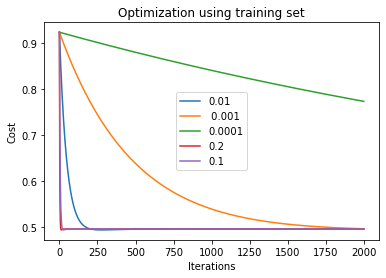

In [119]:
plt.plot(x1,y1, label='0.01' )
plt.plot(x2,y2, label=' 0.001')
plt.plot(x3,y3, label='0.0001')
plt.plot(x4,y4, label='0.2')
plt.plot(x5,y5, label='0.1')
plt.title('Optimization using training set')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()